# Neural Network Modeling for Article Popularity Prediction

In this project, I employed neural network modeling to predict the popularity level of online articles categorized as 'low', 'medium', or 'high'. This classification was based on the number of shares the articles received. The neural network modeling approach involved several key steps:

1. Data Preparation:
Feature Scaling: Normalized the feature data using StandardScaler to ensure all input features have a mean of zero and a standard deviation of one, which is standard practice for neural network models.
Target Encoding: Transformed the categorical target variable ('share_level') into a one-hot encoded format using to_categorical for compatibility with the neural network's output layer.
2. Model Architecture:
Network Structure: Designed a feed-forward neural network with dense layers. The input layer's size was determined by the number of features, and the output layer had three nodes corresponding to the three categories of article popularity.
Activation Functions: Used ReLU (Rectified Linear Unit) for hidden layers due to its efficiency and softmax for the output layer to obtain probabilities for each category.
3. Hyperparameter Tuning:
Optimizer and Neurons: Explored different optimizers (e.g., 'adam', 'rmsprop') and varied the number of neurons in hidden layers to find the optimal settings. This was done using cross-validation and grid search techniques to maximize model accuracy.
4. Model Training and Evaluation:
Cross-validation: Employed k-fold cross-validation to ensure that the model's performance was robust across different subsets of the data.
Performance Metrics: Assessed the model using accuracy, precision, recall, F1-score, and AUC-ROC. These metrics provided a comprehensive view of the model's performance, particularly its ability to handle imbalanced classes, which is often the case in popularity prediction.
5. Results:
The neural network achieved a reasonable level of accuracy, demonstrating its capability to classify articles into their respective popularity categories effectively. The best combination of hyperparameters was identified, which provided insights into the model's dynamics and how different parameters influenced performance.
Conclusion:
This project illustrated the effectiveness of neural networks in handling categorical data and making predictions based on various features of online articles. The process highlighted the importance of meticulous data preparation, thoughtful model design, rigorous evaluation, and the potential need for further optimization to enhance model performance.

In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the data from the CSV file
filename = 'https://raw.githubusercontent.com/Vijayasuriya/M4-DS/main/M4_Data.csv'
df = pd.read_csv(filename, header=0)

df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [2]:
# Strip leading spaces from column names
df.columns = df.columns.str.lstrip()

In [3]:
df.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

### 1. Data Structure and Summary Statistics


In [4]:
# Print dimensions of the dataset

print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (39644, 61)


In [5]:
#data type information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [6]:
df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

In [7]:
# check if there is any row filled with '?' or '-'
num_rows_with_question_or_dash = df.isin(['?', '-']).any(axis=1).sum()
print(num_rows_with_question_or_dash)

0


In [8]:
# check for duplicate data
duplicate_rows_df = df[df.duplicated()]
num_duplicate_rows = duplicate_rows_df.shape[0]

print(duplicate_rows_df)
print('Number of duplicated rows: ', num_duplicate_rows)

Empty DataFrame
Columns: [url, timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday, is_weekend, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negat

In [9]:
df['url'].unique()

array(['http://mashable.com/2013/01/07/amazon-instant-video-browser/',
       'http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/',
       'http://mashable.com/2013/01/07/apple-40-billion-app-downloads/',
       ..., 'http://mashable.com/2014/12/27/son-pays-off-mortgage/',
       'http://mashable.com/2014/12/27/ukraine-blasts/',
       'http://mashable.com/2014/12/27/youtube-channels-2015/'],
      dtype=object)

In [10]:
df = df.drop('url', axis=1)

In [11]:
df = df.drop('timedelta', axis=1)

In [12]:
df

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

I've been exploring this dataset, which has 39,644 entries (rows) and initially had 61 attributes (columns). I first checked its dimensions and found out that it's quite a sizable dataset. The data types in this dataset are mainly float64, which means most of the columns are numerical. There's also an 'object' type column which is the 'url', and an 'int' type column representing 'shares'.

I decided to remove the 'url' and 'timedelta' columns because they might not be directly useful for numerical analysis or predictive modeling. After dropping these columns, I now have 59 columns to work with.

Then, I looked at the descriptive statistics of the dataset. This gave me insights into the mean, standard deviation, minimum, and maximum values for each numerical column. For example, I noticed that the 'n_tokens_title' (number of words in the title) has an average of about 10.4 words, and 'n_tokens_content' (number of words in the content) has a mean of around 546.5 words.

I also checked for missing values in the form of '?' or '-' but found none. This is good as it means the dataset is relatively clean and may not require extensive cleaning or imputation of missing values.

To ensure the integrity of the dataset, I looked for duplicate rows but found none, which is reassuring as it indicates that each row represents a unique entry.

Finally, I examined the 'shares' column because it's likely to be my target variable if I were to predict the popularity or reach of the articles. The 'shares' column ranges from a minimum of 1 to a maximum of 843,300, showing a wide range in the dataset.

# EDA



In [13]:
# list of numerical variables
num_cols = df[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos','average_token_length','num_keywords','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity','shares']]

# check
num_cols.head(10)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   
5            10.0             370.0         0.559889               1.0   
6             8.0             960.0         0.418163               1.0   
7            12.0             989.0         0.433574               1.0   
8            11.0              97.0         0.670103               1.0   
9            10.0             231.0         0.636364               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   
5                  0.698198        2.0             2.0       0.0         0.0   
6                  0.549834       21.0            20.0      20.0         0.0   
7                  0.572108       20.0            20.0      20.0         0.0   
8                  0.836735        2.0             0.0       0.0         0.0   
9                  0.797101        4.0             1.0       1.0         1.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   
5              4.359459  ...               0.136364                    0.6   
6              4.654167  ...               0.100000                    1.0   
7              4.617796  ...               0.100000                    1.0   
8              4.855670  ...               0.400000                    0.8   
9              5.090909  ...               0.100000                    0.5   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   
5              -0.195000                 -0.400              -0.100000   
6              -0.224479                 -0.500              -0.050000   
7              -0.242778                 -0.500              -0.050000   
8              -0.125000                 -0.125              -0.125000   
9              -0.238095                 -0.500              -0.100000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   
5            0.642857                  0.214286                0.142857   
6            0.000000                  0.000000                0.500000   
7            1.000000            

In [14]:
# Creating categorical variables
var_cols = df[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend',]]

#check
var_cols.head()

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                        0.0                            1.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            0.0   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                  0.0                     0.0                   0.0   
1                  1.0                     0.0                   0.0   
2                  1.0                     0.0                   0.0   
3                  0.0                     0.0                   0.0   
4                  0.0                     0.0                   1.0   

   data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
0                    0.0                1.0                 0.0   
1                    0.0                1.0                 0.0   
2                    0.0                1.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday_is_saturday  weekday_is_sunday  is_weekend  
0                  0.0                0.0         0.0  
1                  0.0                0.0         0.0  
2                  0.0                0.0         0.0  
3                  0.0                0.0         0.0  
4                  0.0                0.0         0.0

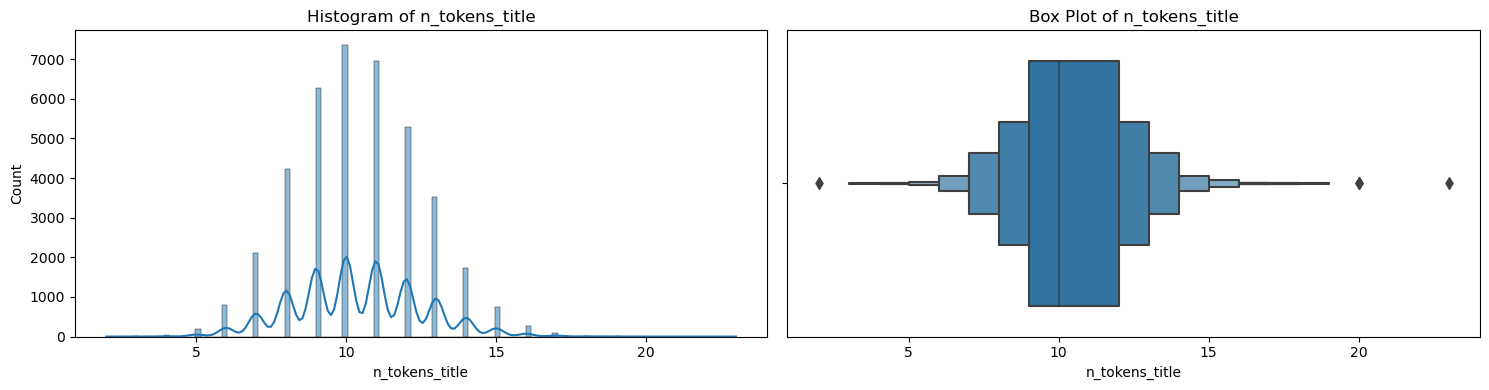

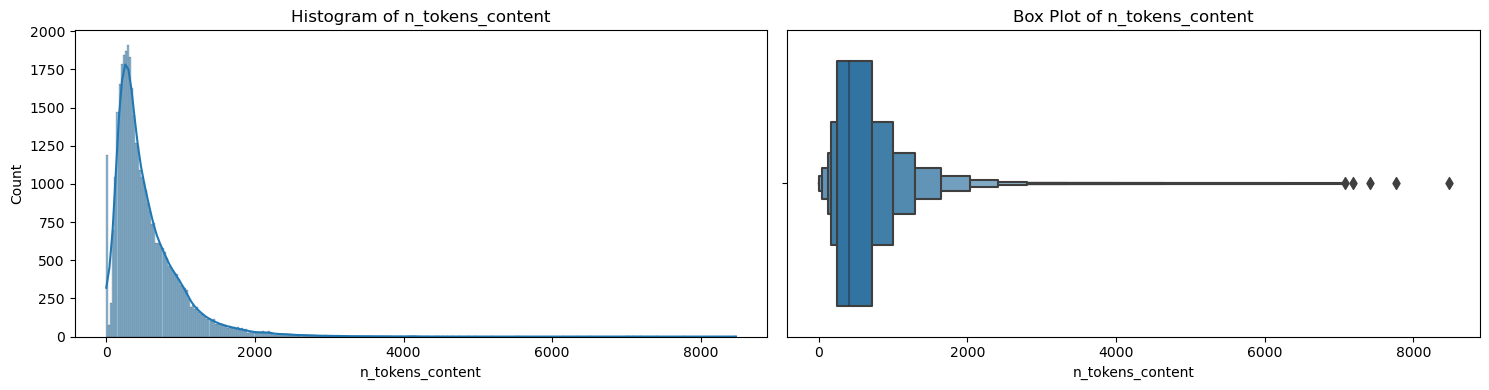

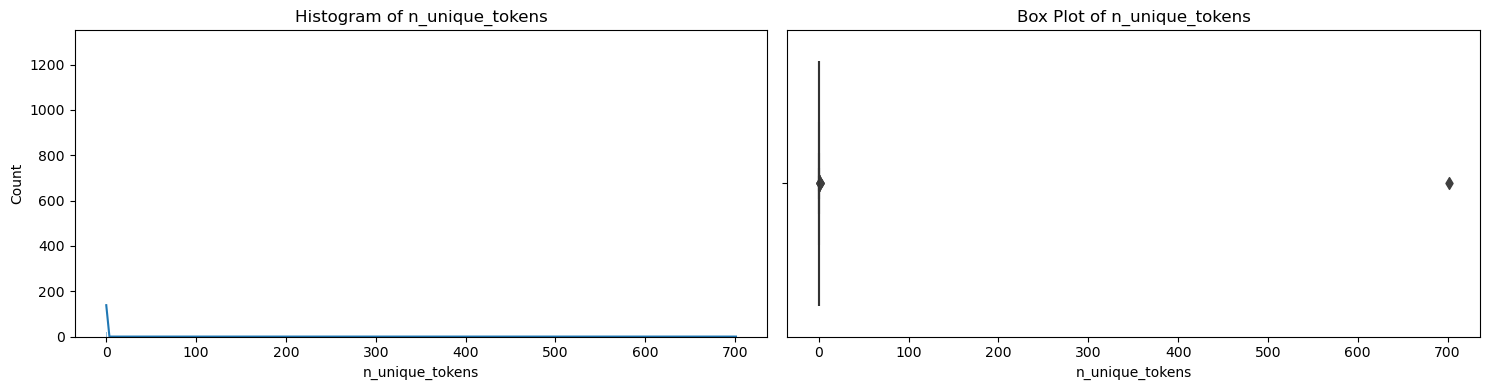

In [15]:
tokens = df[['n_tokens_title','n_tokens_content', 'n_unique_tokens']]

for col in tokens.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = tokens[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = tokens[col])

    plt.tight_layout()
    plt.show()

In [16]:
highest_value_non_stop_words = df['n_non_stop_words'].max()
lowest_value_non_stop_words = df['n_non_stop_words'].min()

highest_value_non_stop_unique_tokens = df['n_non_stop_unique_tokens'].max()
lowest_value_non_stop_unique_tokens = df['n_non_stop_unique_tokens'].min()

print('Highest value for n_non_stop_words:', highest_value_non_stop_words)
print('Lowest value for n_non_stop_words:', lowest_value_non_stop_words)

print('Highest value for n_non_stop_unique_tokens:', highest_value_non_stop_unique_tokens)
print('Lowest value for n_non_stop_unique_tokens:', lowest_value_non_stop_unique_tokens)

Highest value for n_non_stop_words: 1042.0
Lowest value for n_non_stop_words: 0.0
Highest value for n_non_stop_unique_tokens: 650.0
Lowest value for n_non_stop_unique_tokens: 0.0


In [17]:
# Define a function to find outliers
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Find and count outliers for 'n_non_stop_words'
outliers_non_stop_words = find_outliers(df, 'n_non_stop_words')
count_non_stop_words = len(outliers_non_stop_words)

# Find and count outliers for 'n_non_stop_unique_tokens'
outliers_non_stop_unique_tokens = find_outliers(df, 'n_non_stop_unique_tokens')
count_non_stop_unique_tokens = len(outliers_non_stop_unique_tokens)

print(f"Number of outliers in 'n_non_stop_words': {count_non_stop_words}")
print(f"Number of outliers in 'n_non_stop_unique_tokens': {count_non_stop_unique_tokens}")

Number of outliers in 'n_non_stop_words': 2827
Number of outliers in 'n_non_stop_unique_tokens': 1733


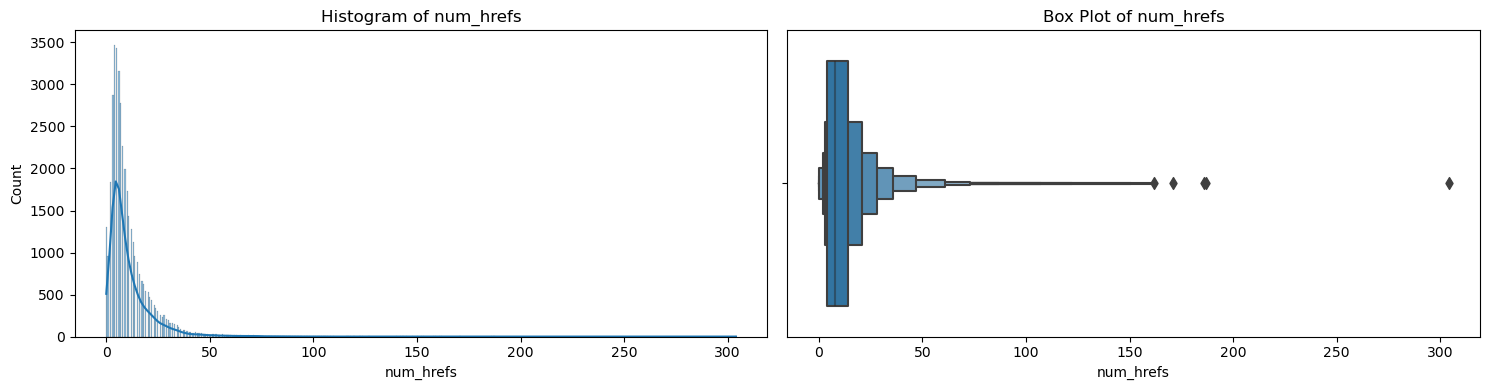

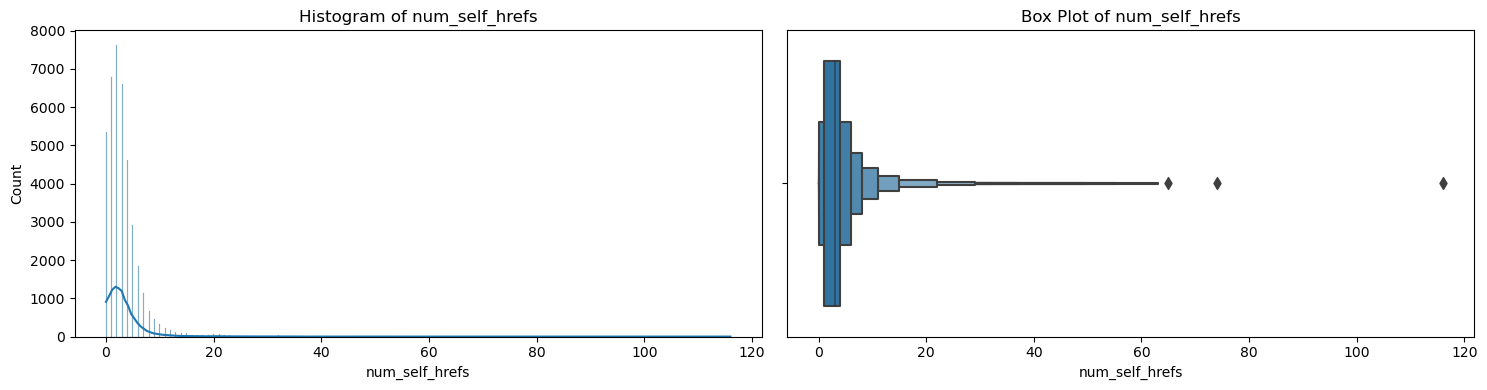

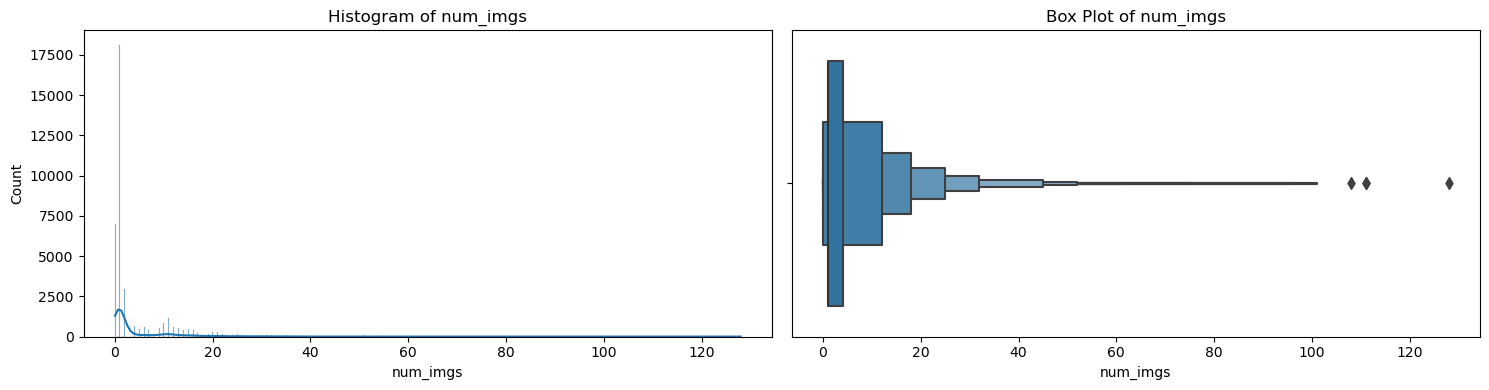

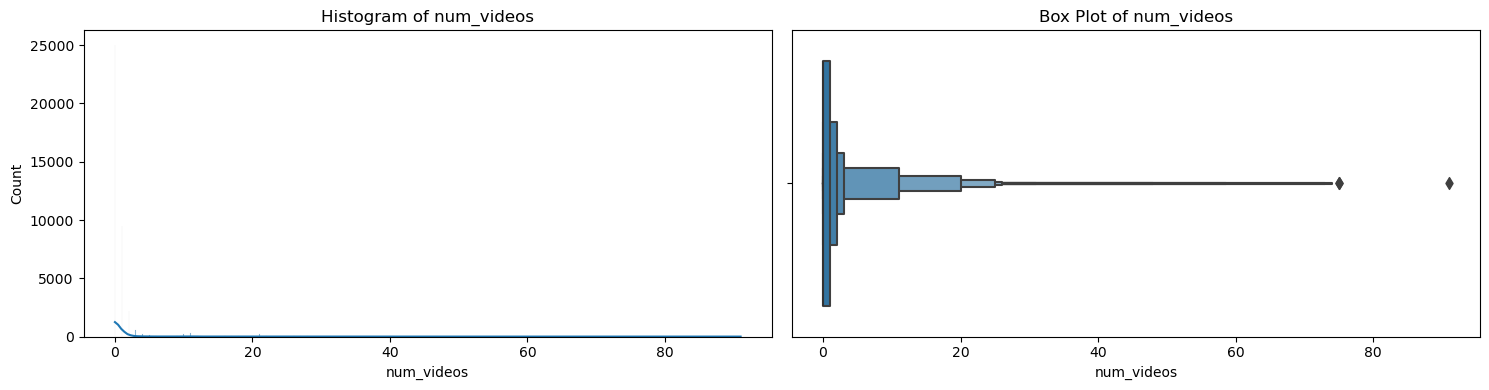

In [18]:
hrefs_imgs_videos = df[['num_hrefs','num_self_hrefs','num_imgs','num_videos']]

for col in hrefs_imgs_videos.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = hrefs_imgs_videos[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = hrefs_imgs_videos[col])

    plt.tight_layout()
    plt.show()

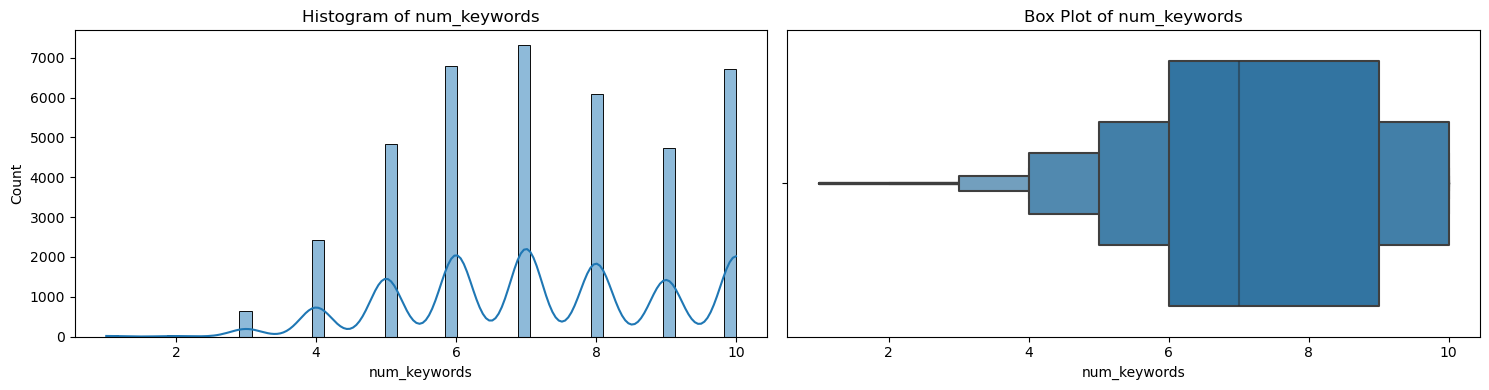

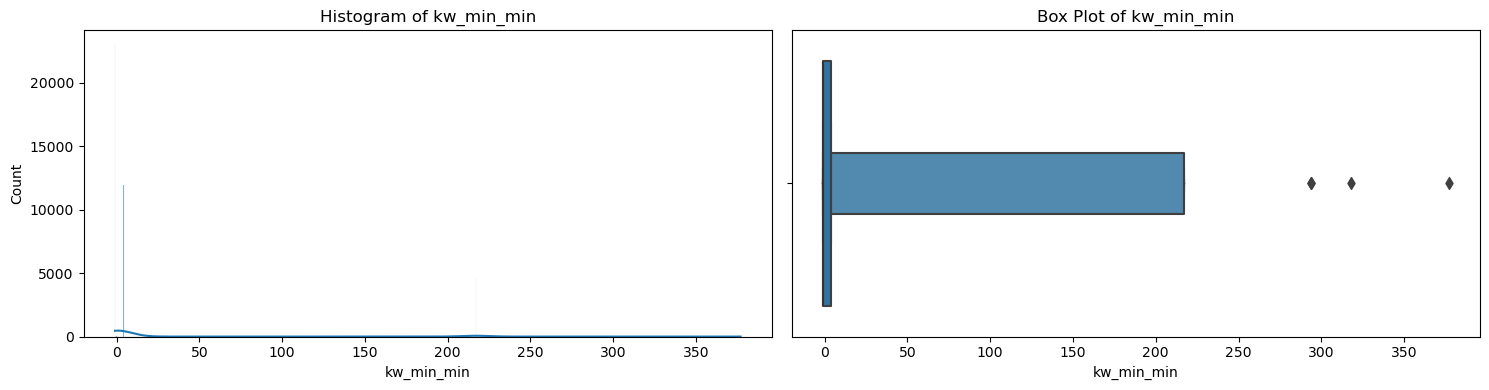

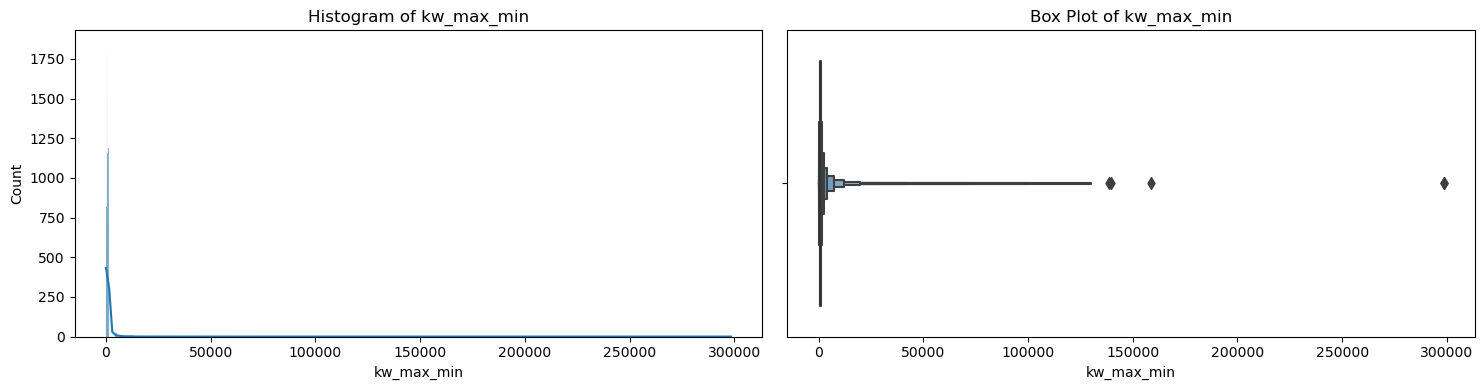

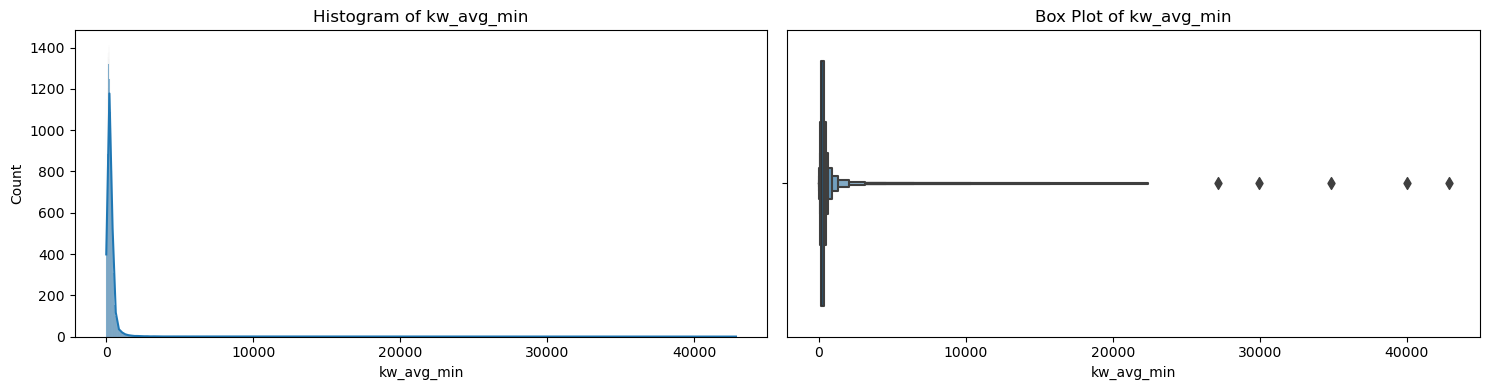

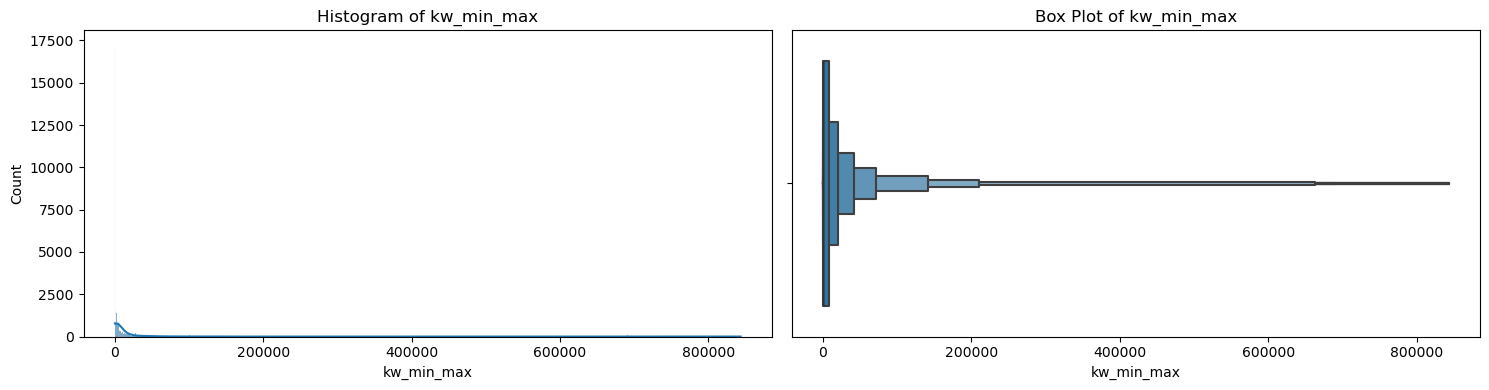

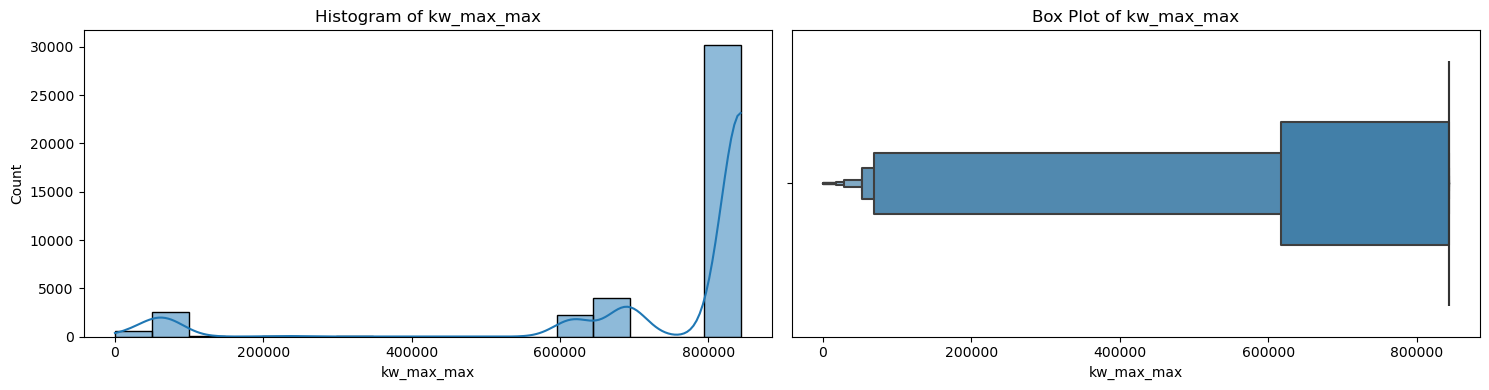

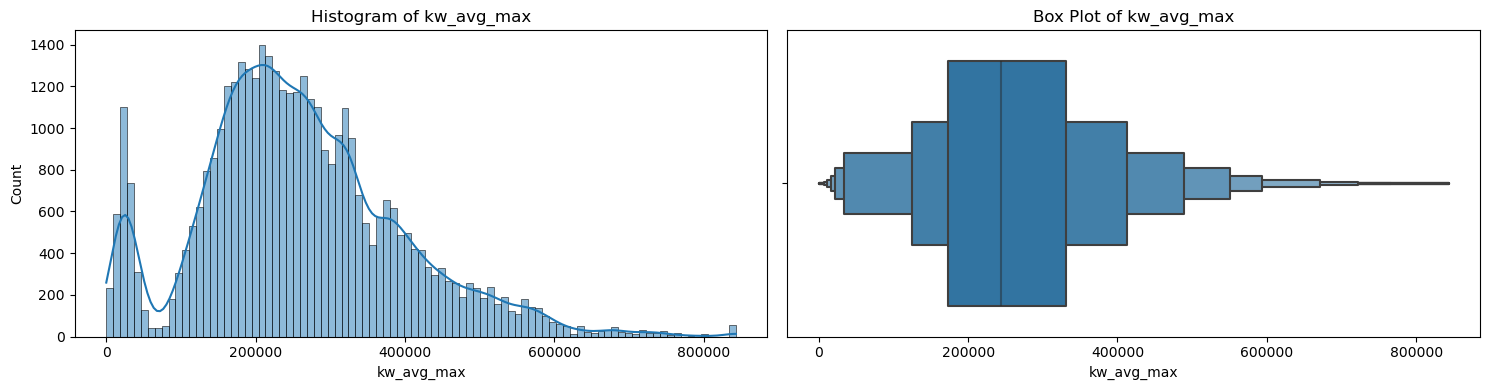

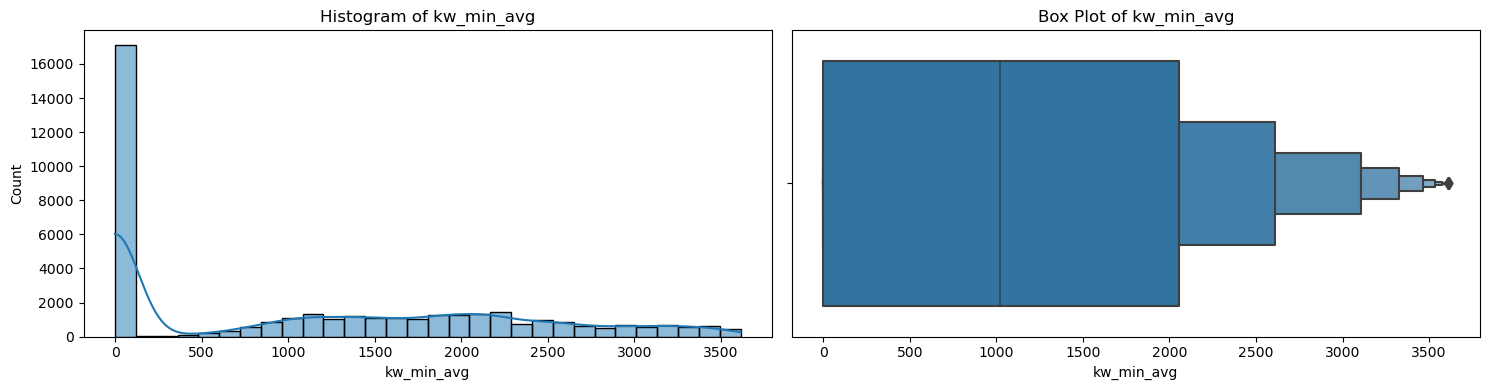

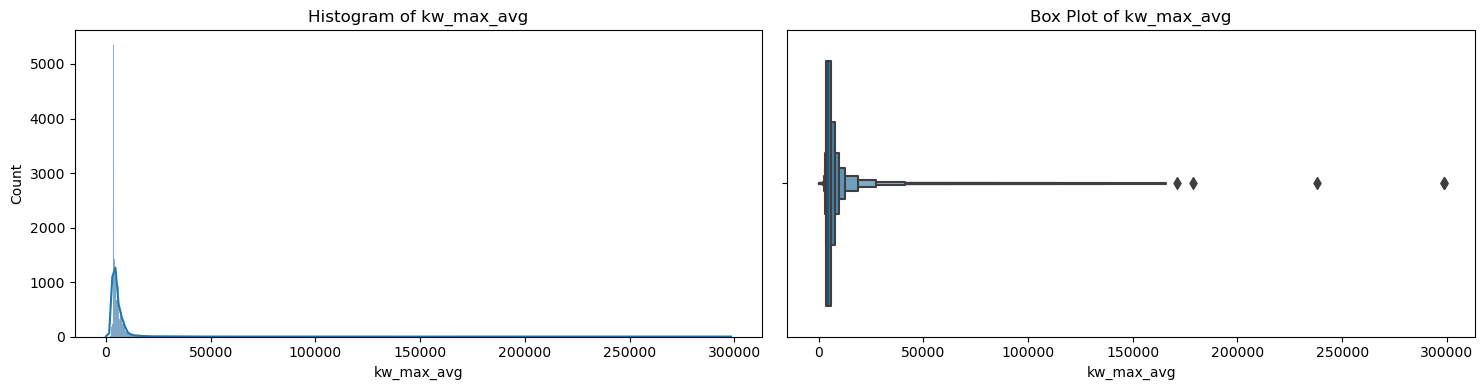

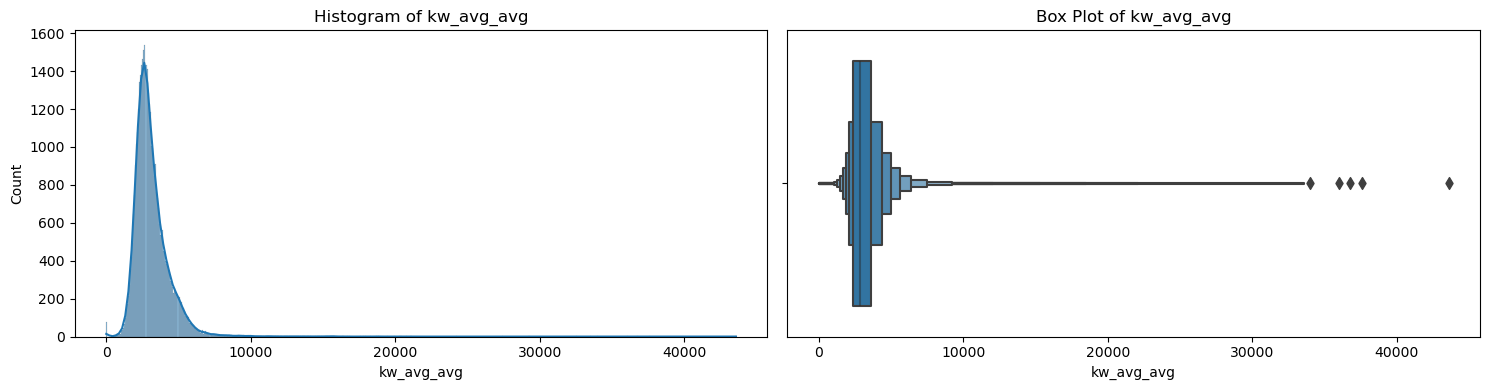

In [19]:
key_words = df[['num_keywords','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg']]

for col in key_words.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = key_words[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = key_words[col])

    plt.tight_layout()
    plt.show()

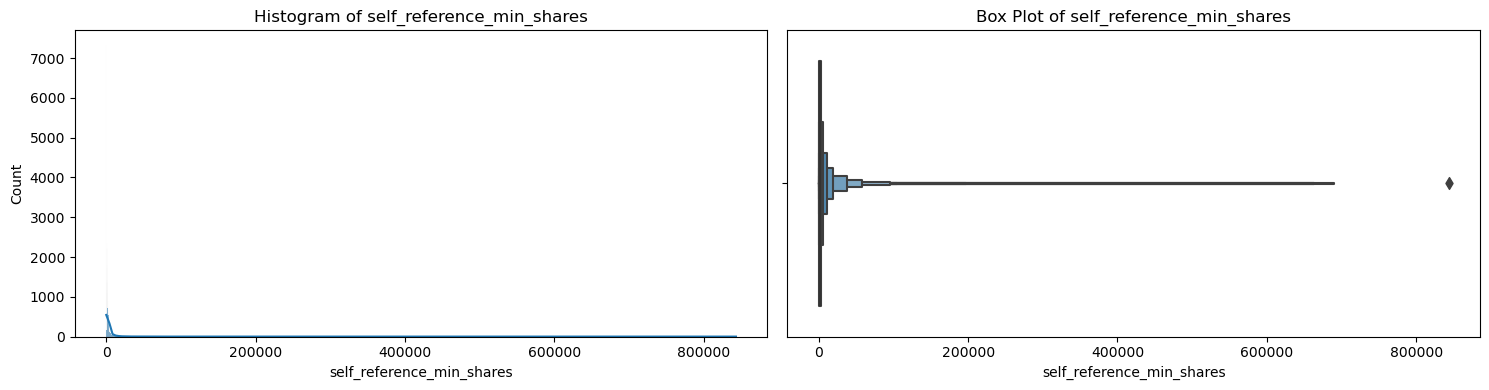

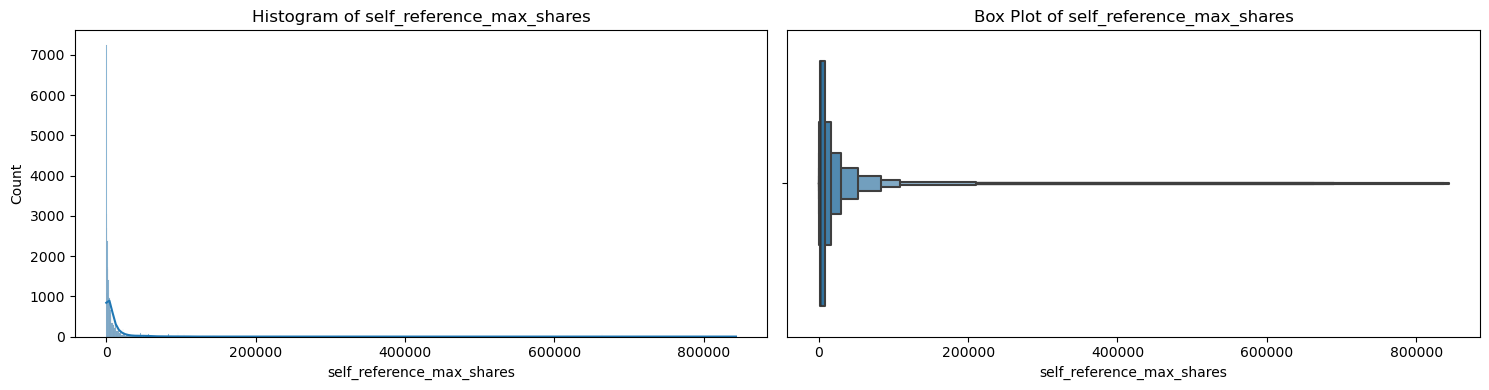

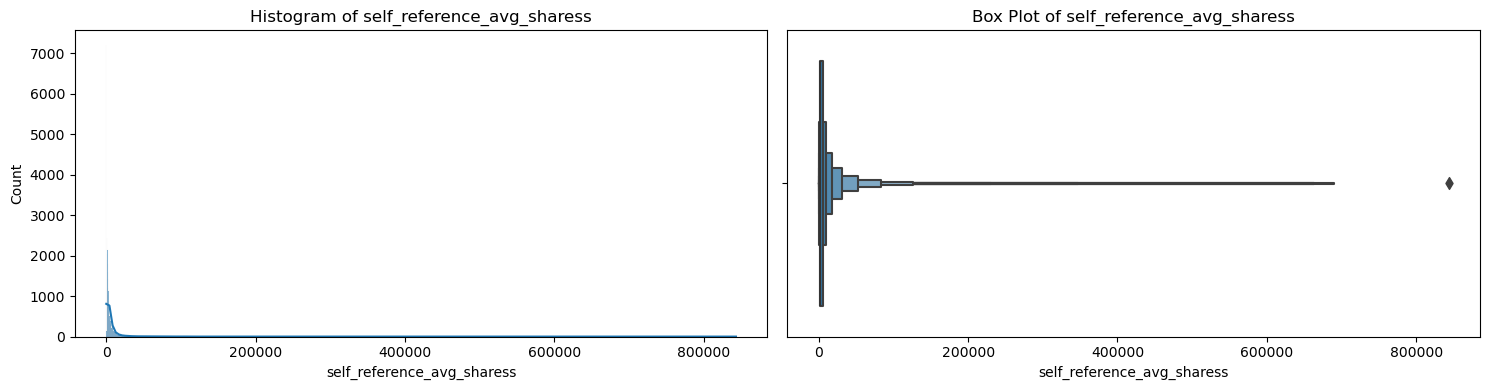

In [20]:
self_reference = df[['self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']]

for col in self_reference.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = self_reference[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = self_reference[col])

    plt.tight_layout()
    plt.show()

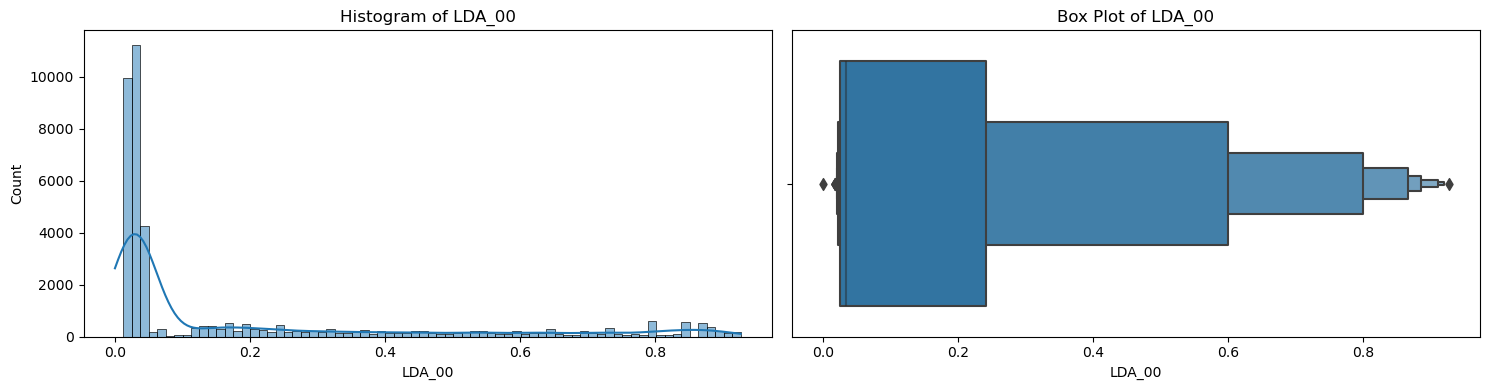

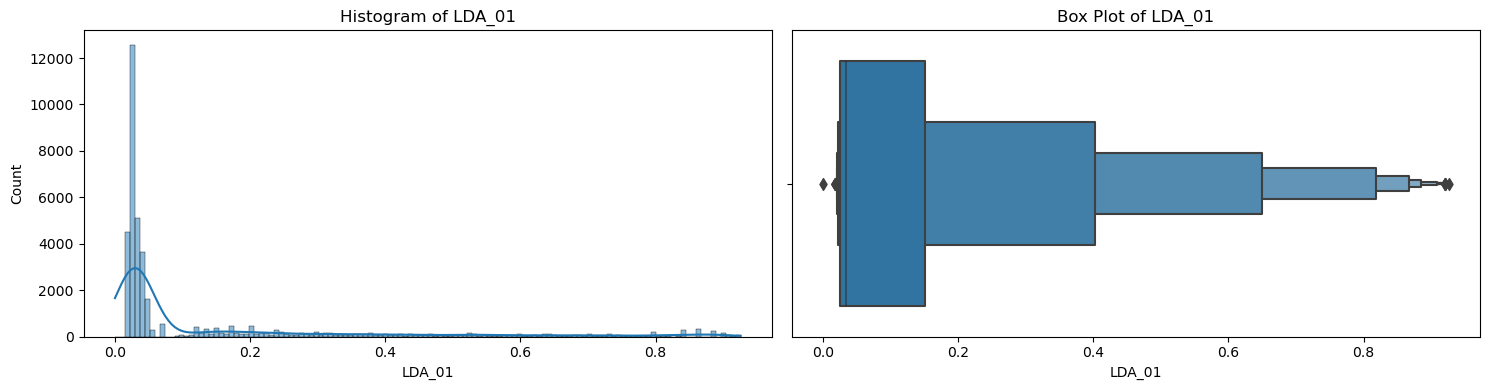

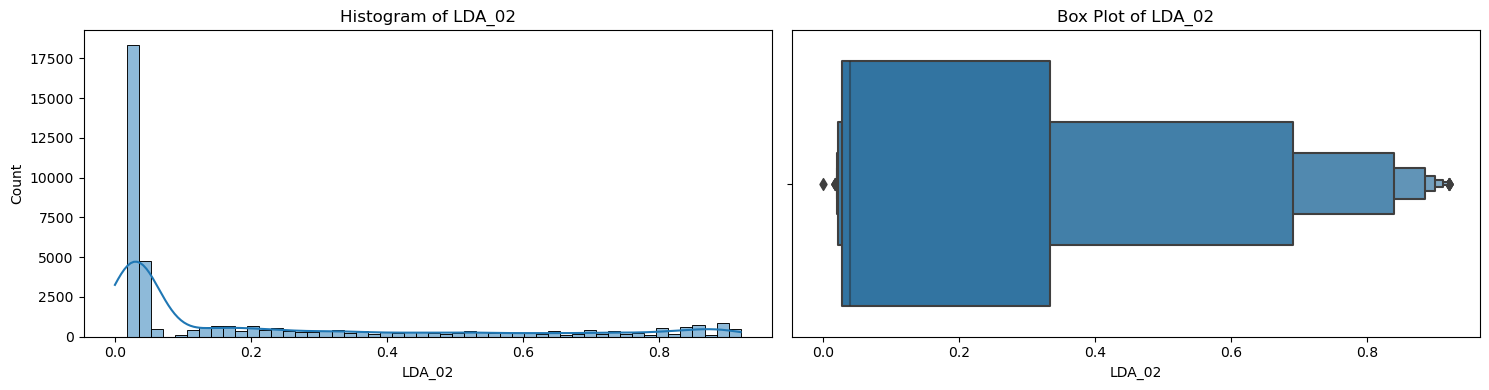

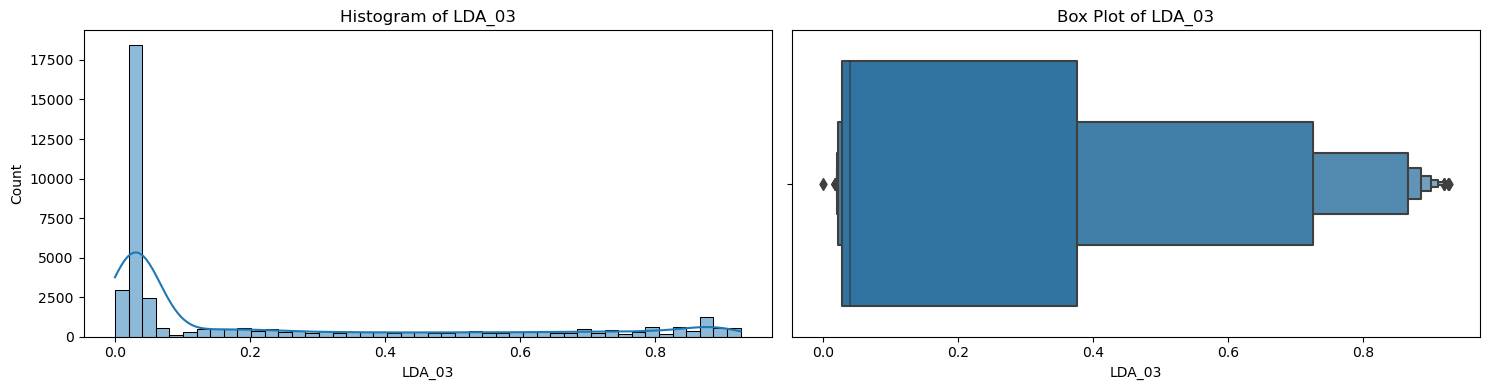

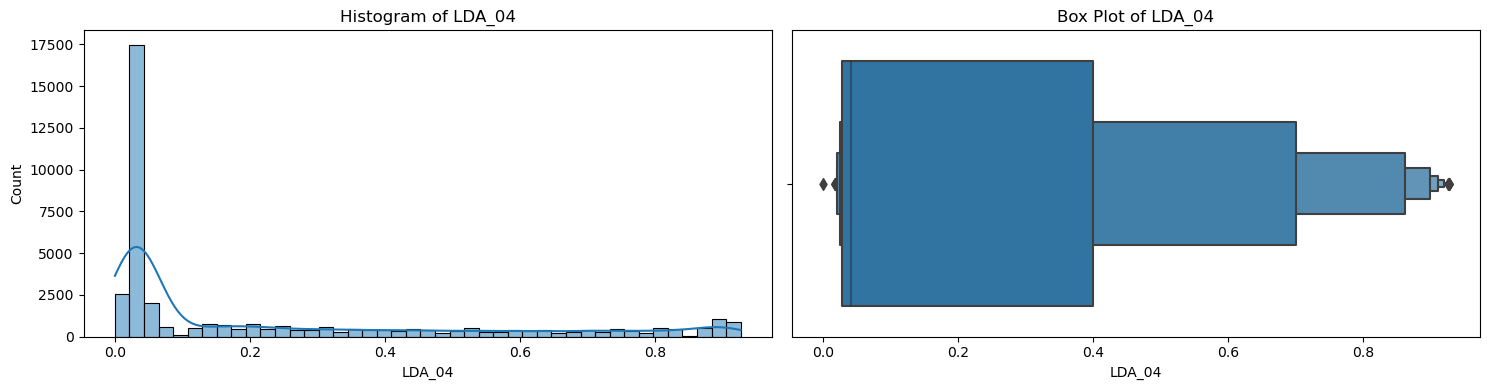

In [21]:
LDA = df[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']]

for col in LDA.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = LDA[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = LDA[col])

    plt.tight_layout()
    plt.show()

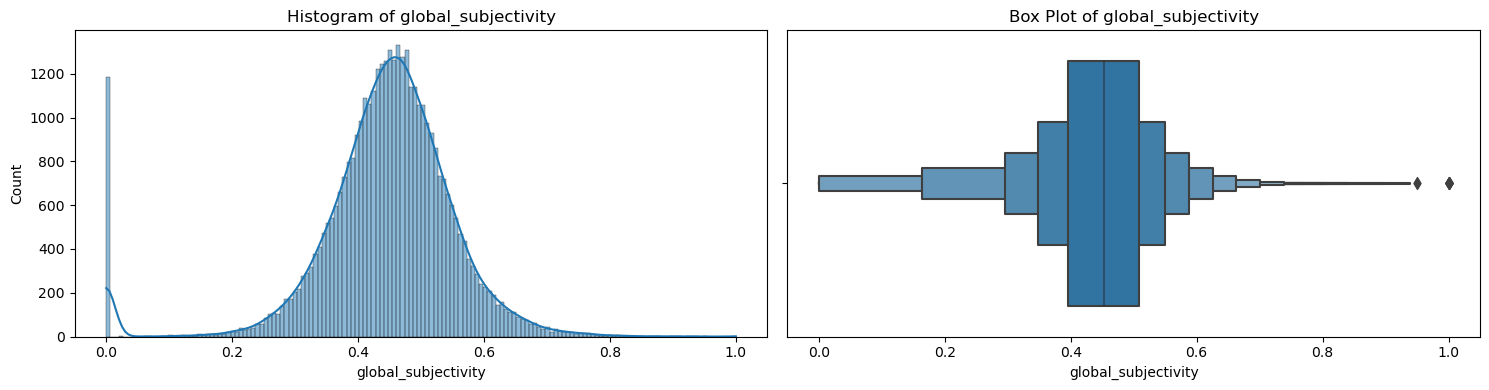

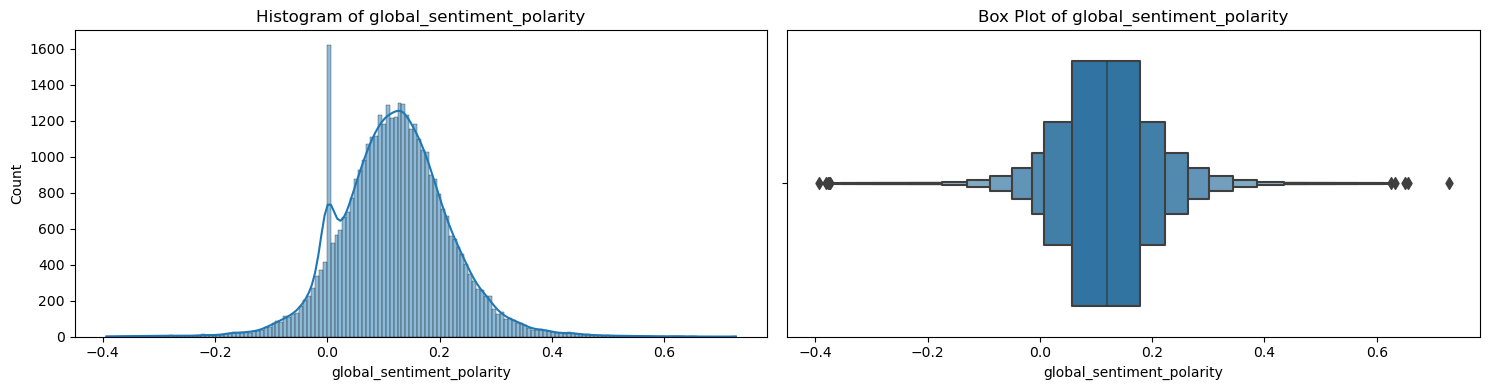

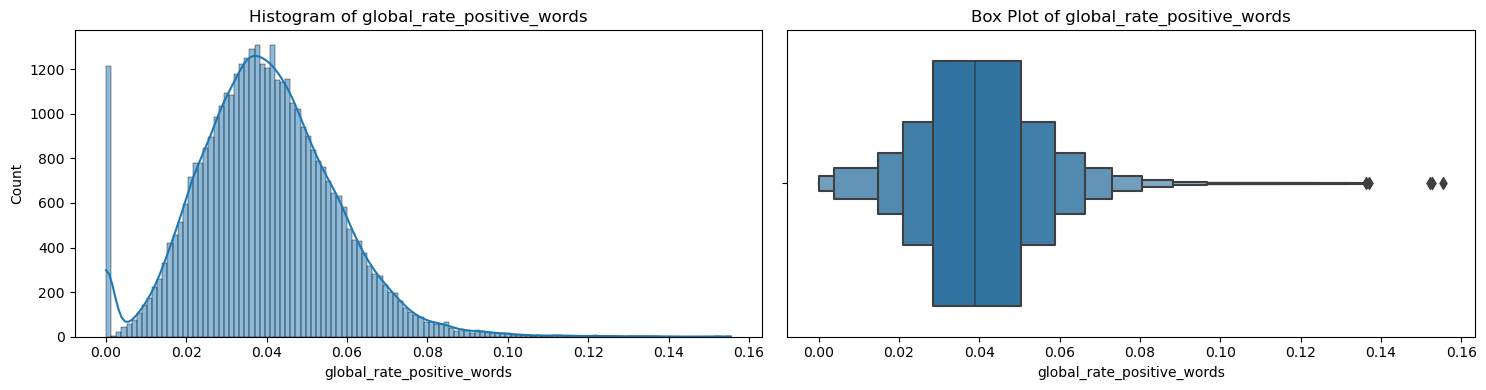

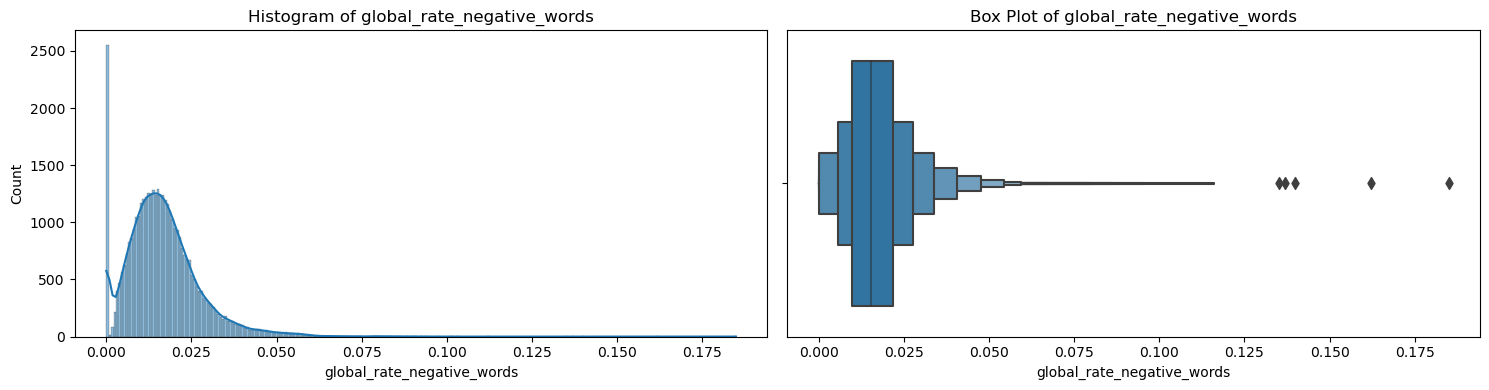

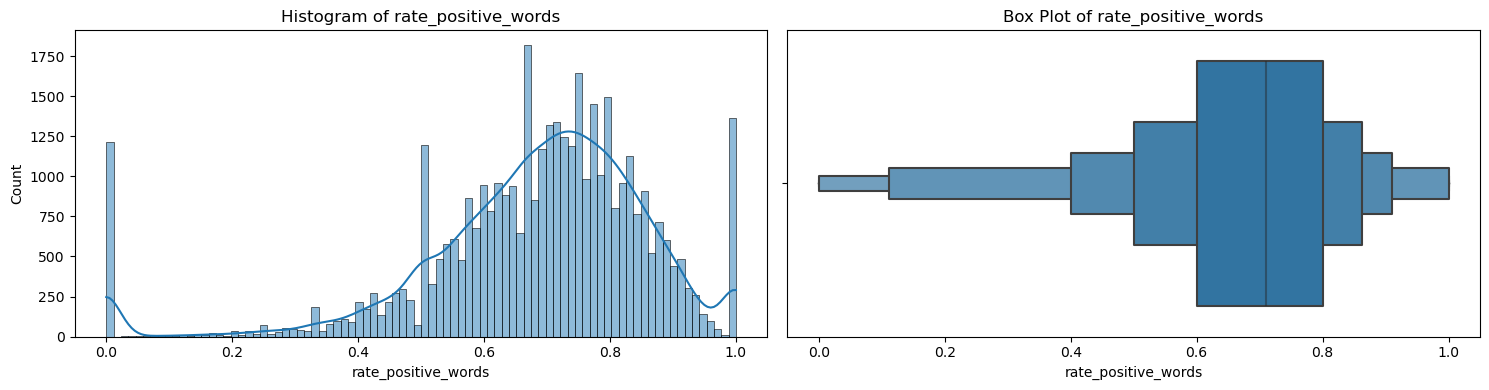

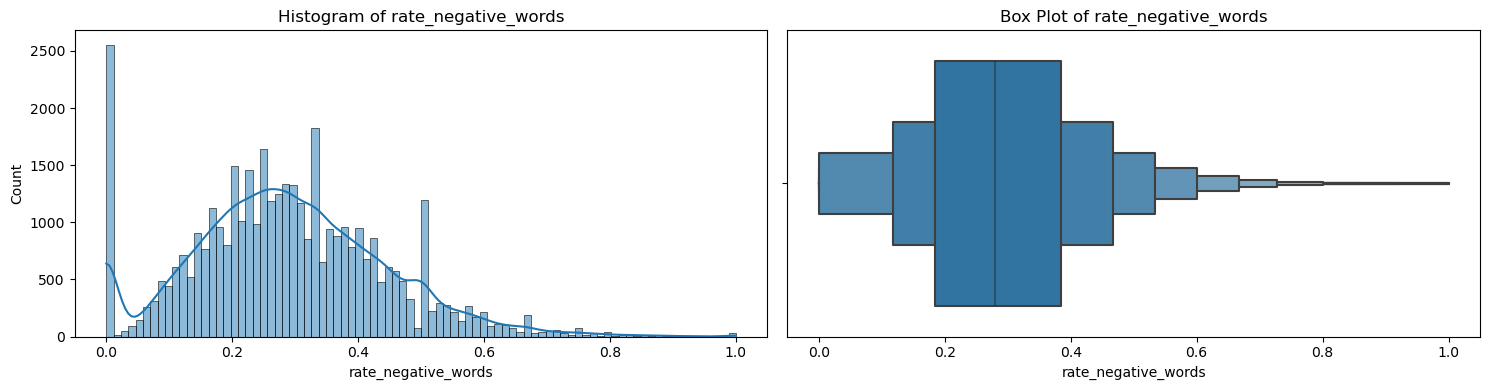

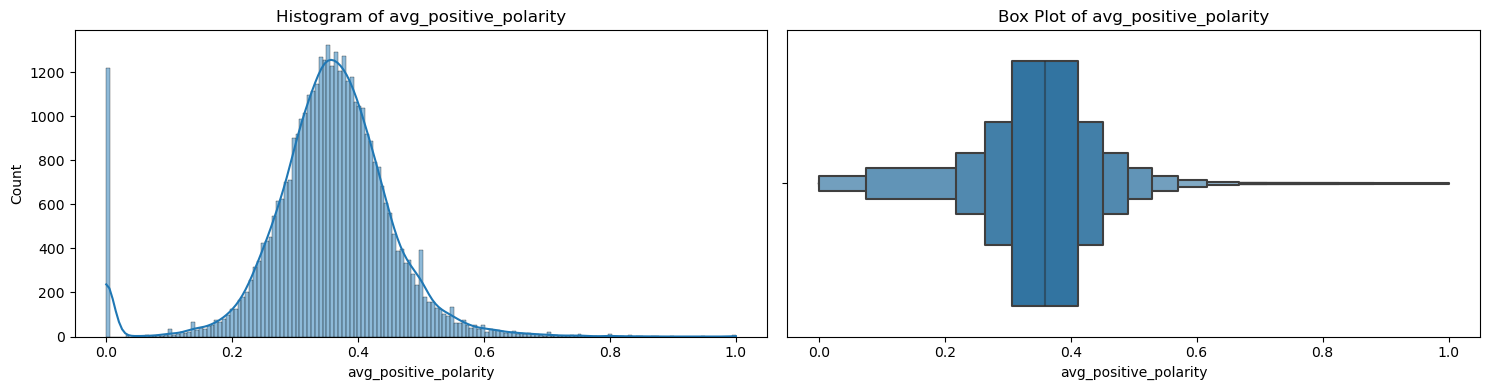

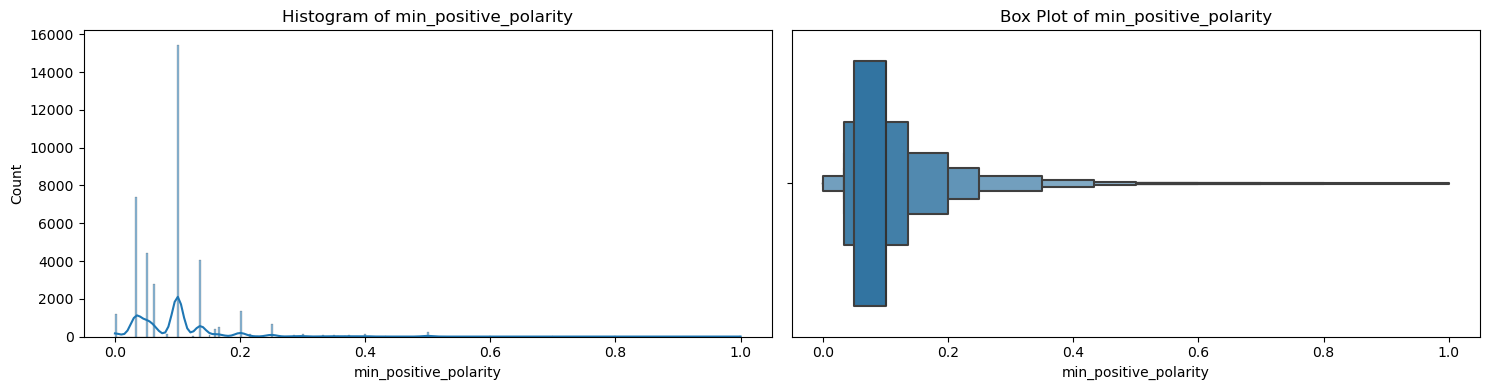

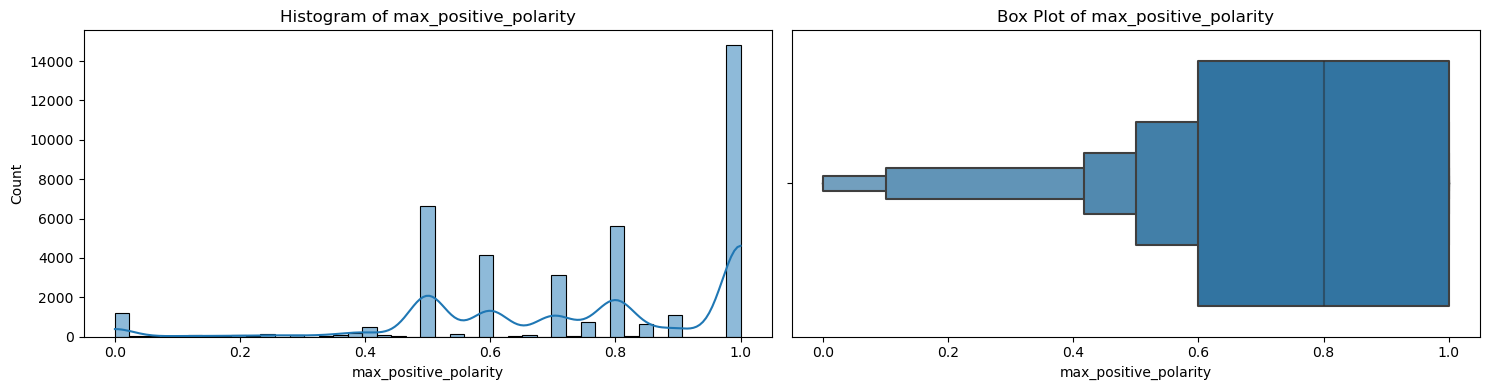

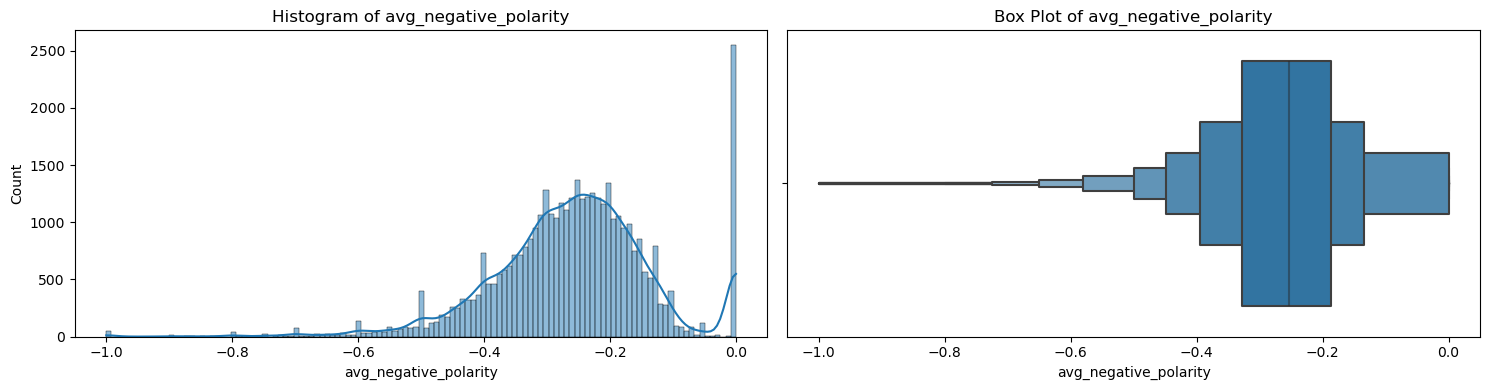

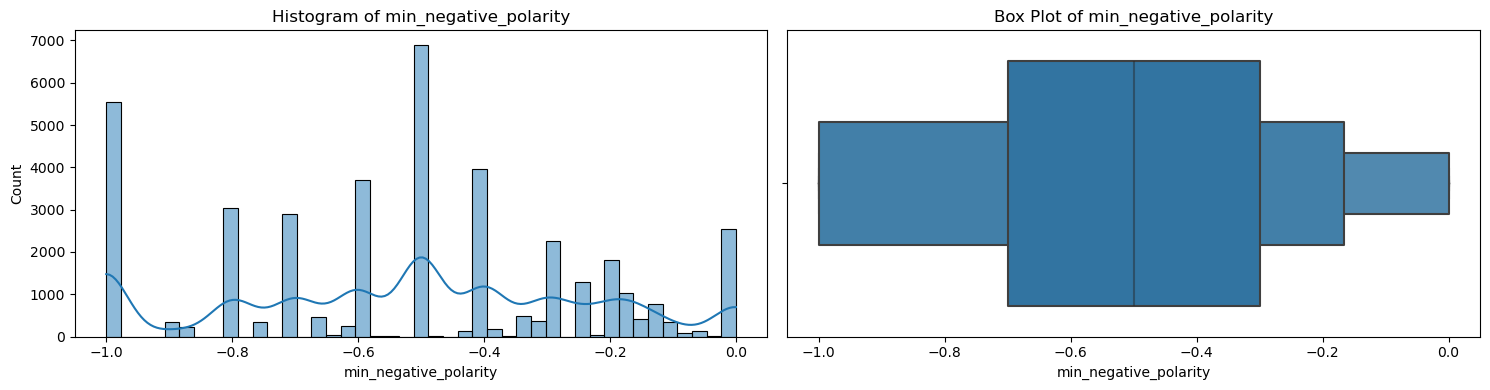

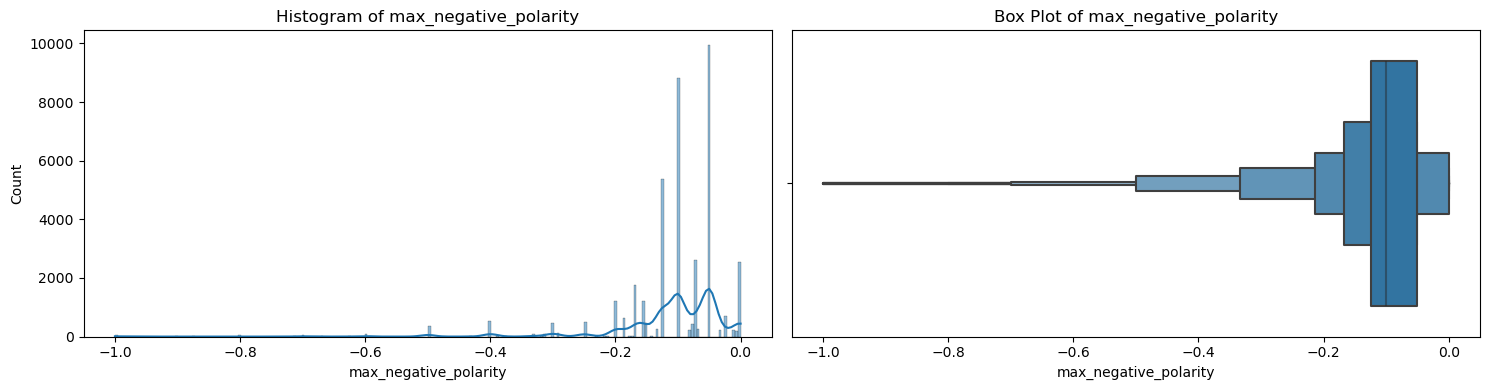

In [22]:
sentiment = df[['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity','max_negative_polarity']]

for col in sentiment.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = sentiment[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = sentiment[col])

    plt.tight_layout()
    plt.show()

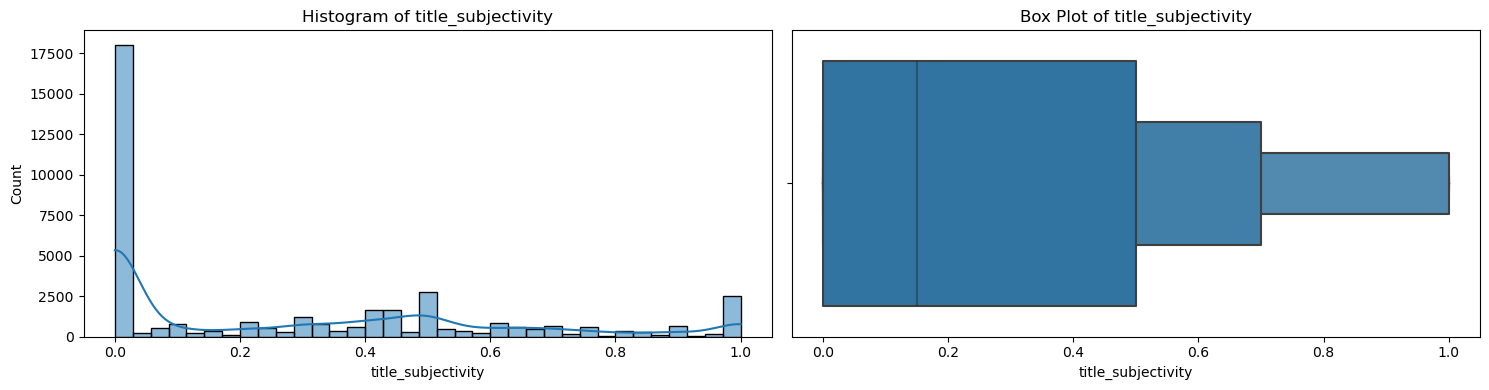

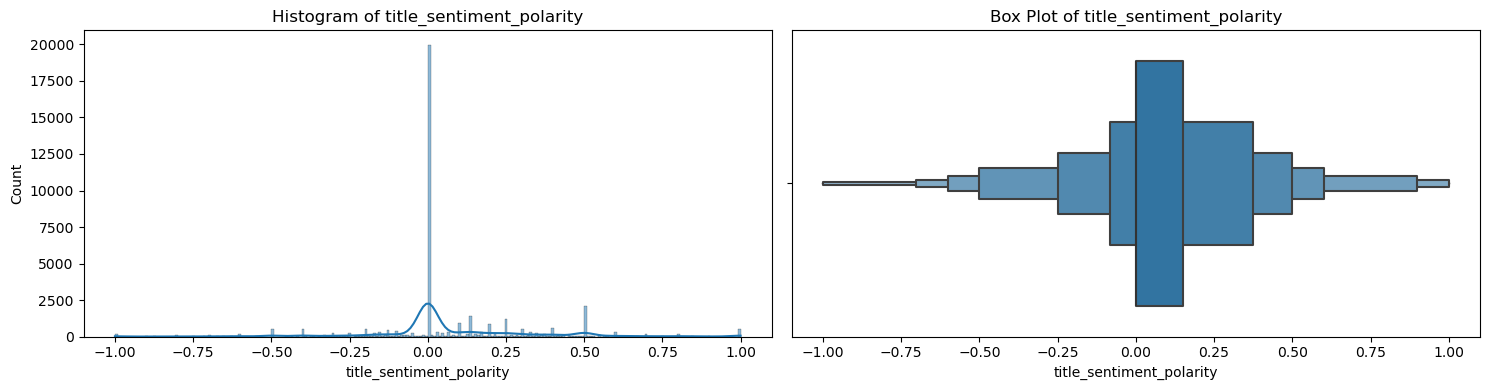

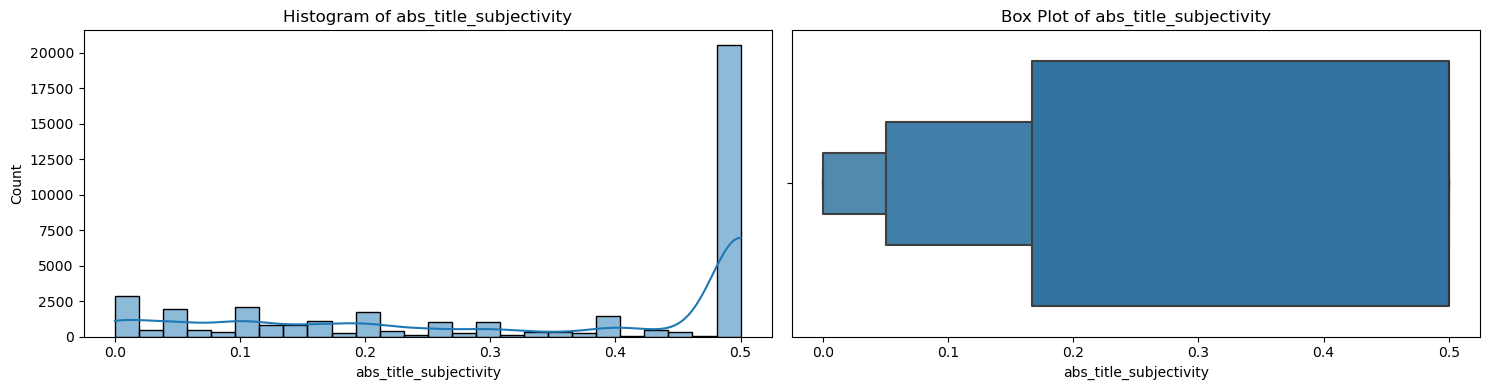

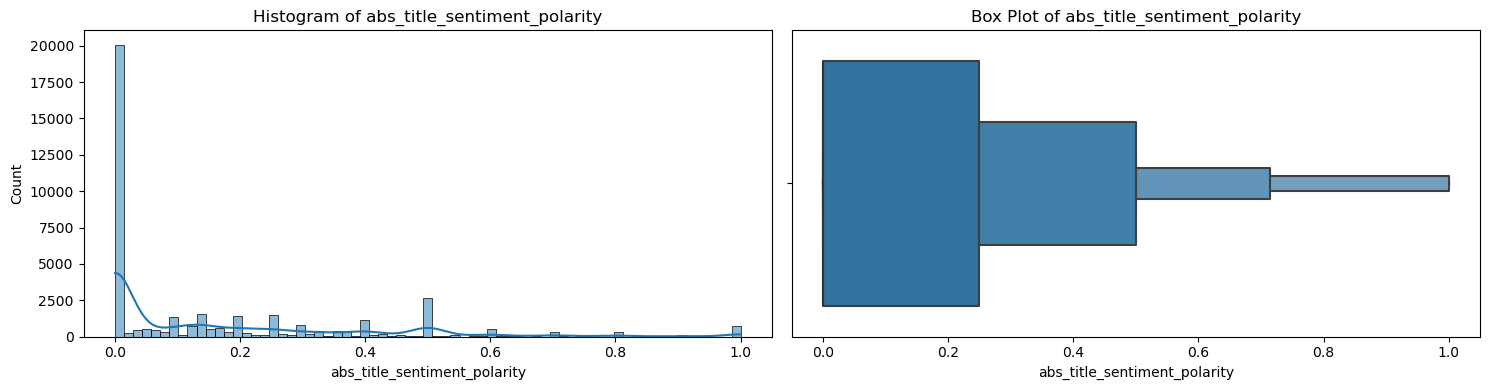

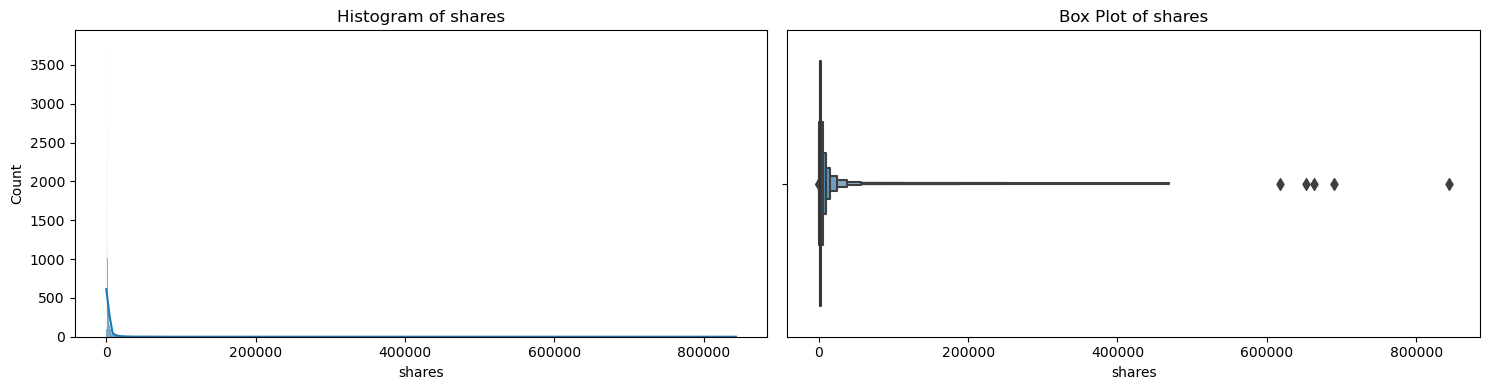

In [23]:
title_share = df[['title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity','shares']]

for col in title_share.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = title_share[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = title_share[col])

    plt.tight_layout()
    plt.show()

In [24]:
# Define a function to calculate the number of outliers
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

# Apply the function to each column of num_cols
outliers_count = {col: count_outliers(num_cols, col) for col in num_cols.columns}

# Sort the dictionary by values in descending order
outliers_count_sorted = dict(sorted(outliers_count.items(), key=lambda item: item[1], reverse=True))

# Print only the columns with outliers
for col, count in outliers_count_sorted.items():
    if count > 0:
        print(f"Number of outliers in '{col}': {count}")

Number of outliers in 'kw_max_max': 9440
Number of outliers in 'num_imgs': 7703
Number of outliers in 'title_sentiment_polarity': 7592
Number of outliers in 'LDA_01': 5834
Number of outliers in 'LDA_00': 5282
Number of outliers in 'kw_min_max': 5063
Number of outliers in 'self_reference_min_shares': 4976
Number of outliers in 'kw_min_min': 4677
Number of outliers in 'shares': 4541
Number of outliers in 'self_reference_avg_sharess': 4209
Number of outliers in 'self_reference_max_shares': 4183
Number of outliers in 'kw_max_min': 3661
Number of outliers in 'LDA_02': 3541
Number of outliers in 'min_positive_polarity': 3147
Number of outliers in 'num_videos': 2946
Number of outliers in 'n_non_stop_words': 2827
Number of outliers in 'max_negative_polarity': 2454
Number of outliers in 'kw_max_avg': 2391
Number of outliers in 'num_hrefs': 2169
Number of outliers in 'avg_positive_polarity': 2095
Number of outliers in 'num_self_hrefs': 2090
Number of outliers in 'kw_avg_min': 2081
Number of outl

In [25]:
from scipy.stats import zscore

# Apply the Z-score function to each column of num_cols
z_scores = zscore(num_cols)

# Define a threshold for the Z-scores
threshold = 3

# Identify the outliers
outliers = (abs(z_scores) > threshold).sum(axis=0)

# Print only the columns with outliers, sorted by the number of outliers in descending order
outliers_count = {col: outliers[idx] for idx, col in enumerate(num_cols.columns) if outliers[idx] > 0}
outliers_count_sorted = dict(sorted(outliers_count.items(), key=lambda item: item[1], reverse=True))

for col, count in outliers_count_sorted.items():
    print(f"Number of outliers in '{col}': {count}")

Number of outliers in 'kw_max_max': 3096
Number of outliers in 'avg_positive_polarity': 1374
Number of outliers in 'LDA_01': 1303
Number of outliers in 'rate_positive_words': 1241
Number of outliers in 'global_subjectivity': 1240
Number of outliers in 'max_positive_polarity': 1217
Number of outliers in 'average_token_length': 1185
Number of outliers in 'max_negative_polarity': 1152
Number of outliers in 'num_videos': 986
Number of outliers in 'title_sentiment_polarity': 914
Number of outliers in 'abs_title_sentiment_polarity': 871
Number of outliers in 'num_imgs': 863
Number of outliers in 'min_positive_polarity': 751
Number of outliers in 'num_hrefs': 731
Number of outliers in 'num_self_hrefs': 699
Number of outliers in 'n_tokens_content': 693
Number of outliers in 'global_rate_negative_words': 548
Number of outliers in 'kw_min_max': 469
Number of outliers in 'kw_max_avg': 393
Number of outliers in 'global_sentiment_polarity': 392
Number of outliers in 'kw_avg_avg': 378
Number of outl

In [26]:
high_outliers = df[['kw_max_max','avg_positive_polarity','LDA_01','rate_positive_words','global_subjectivity','max_positive_polarity','average_token_length','max_negative_polarity']]
high_outliers.head()

kw_max_max  avg_positive_polarity    LDA_01  rate_positive_words  \
0         0.0               0.378636  0.378279             0.769231   
1         0.0               0.286915  0.050047             0.733333   
2         0.0               0.495833  0.033334             0.857143   
3         0.0               0.385965  0.419300             0.666667   
4         0.0               0.411127  0.028794             0.860215   

   global_subjectivity  max_positive_polarity  average_token_length  \
0             0.521617                    0.7              4.680365   
1             0.341246                    0.7              4.913725   
2             0.702222                    1.0              4.393365   
3             0.429850                    0.8              4.404896   
4             0.513502                    1.0              4.682836   

   max_negative_polarity  
0              -0.200000  
1              -0.100000  
2              -0.133333  
3              -0.166667  
4              -0.050000

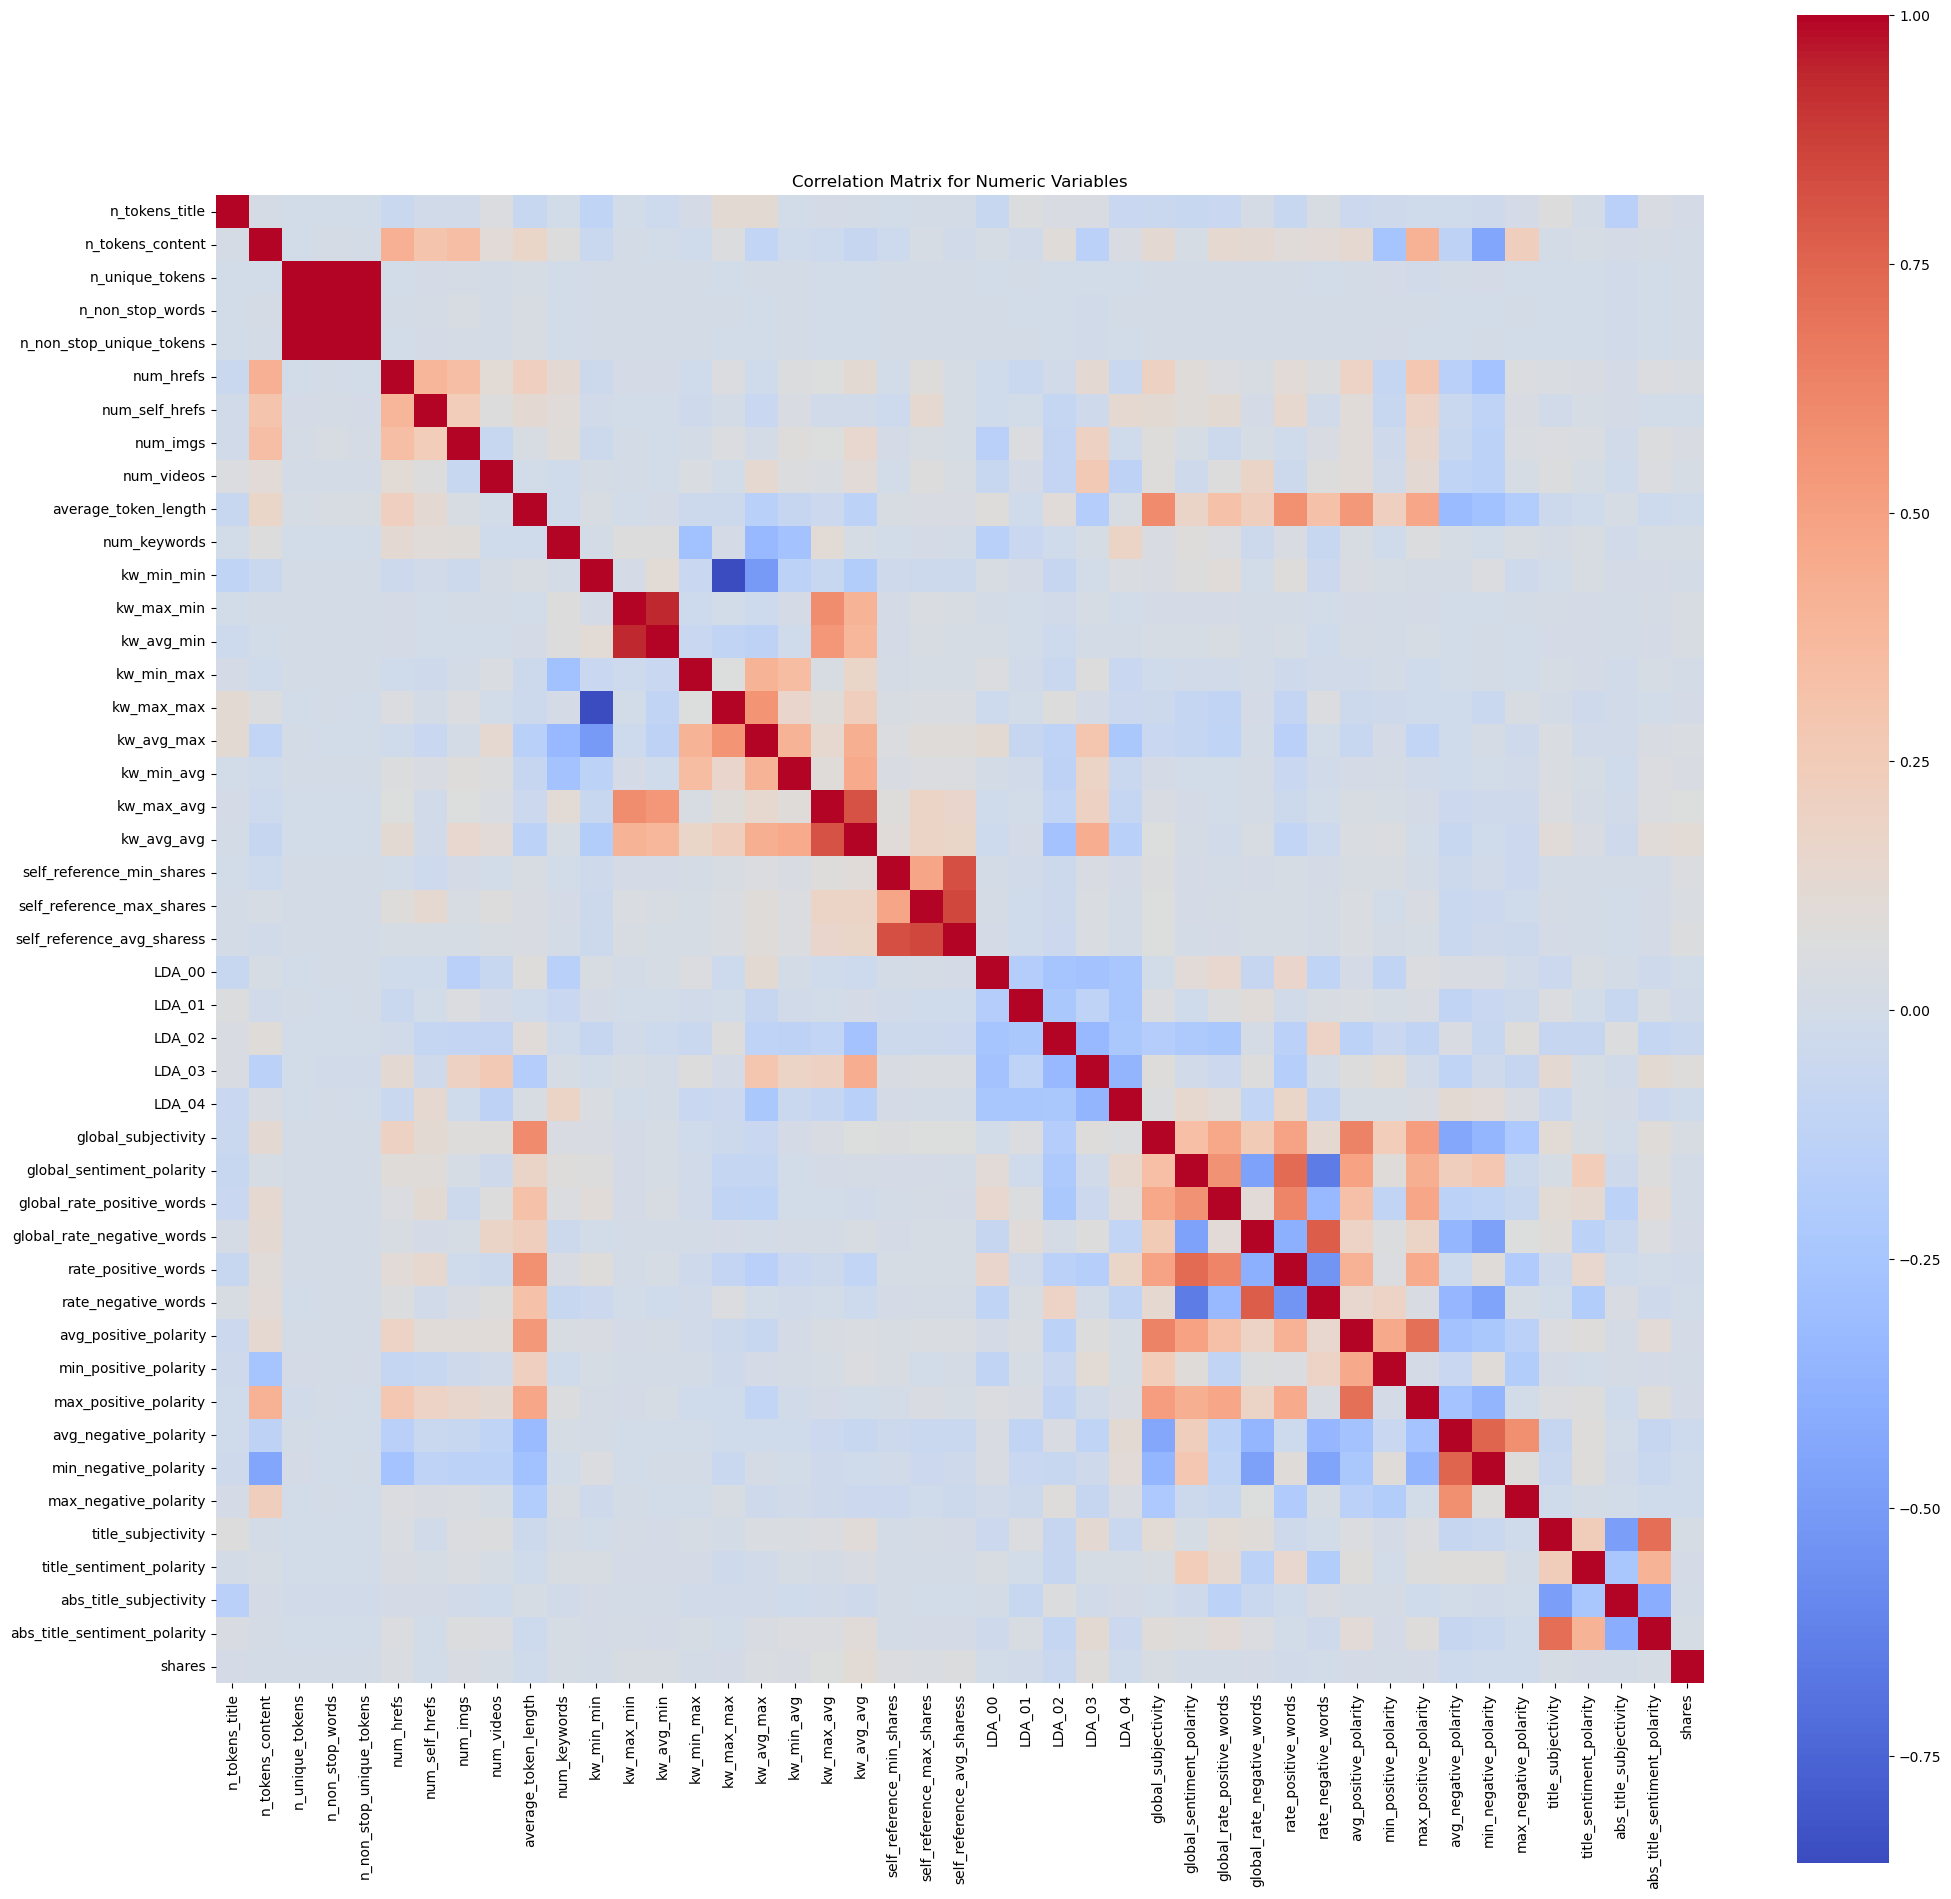

In [27]:
# Compute the correlation matrix for the selected columns in num_cols
corr_matrix = num_cols.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [28]:
df2 = df.copy()

In [29]:
a,b = df2['shares'].mean(),df2['shares'].median()

In [30]:
Weekday = df2.columns.values[29:37]
Weekday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend'], dtype=object)

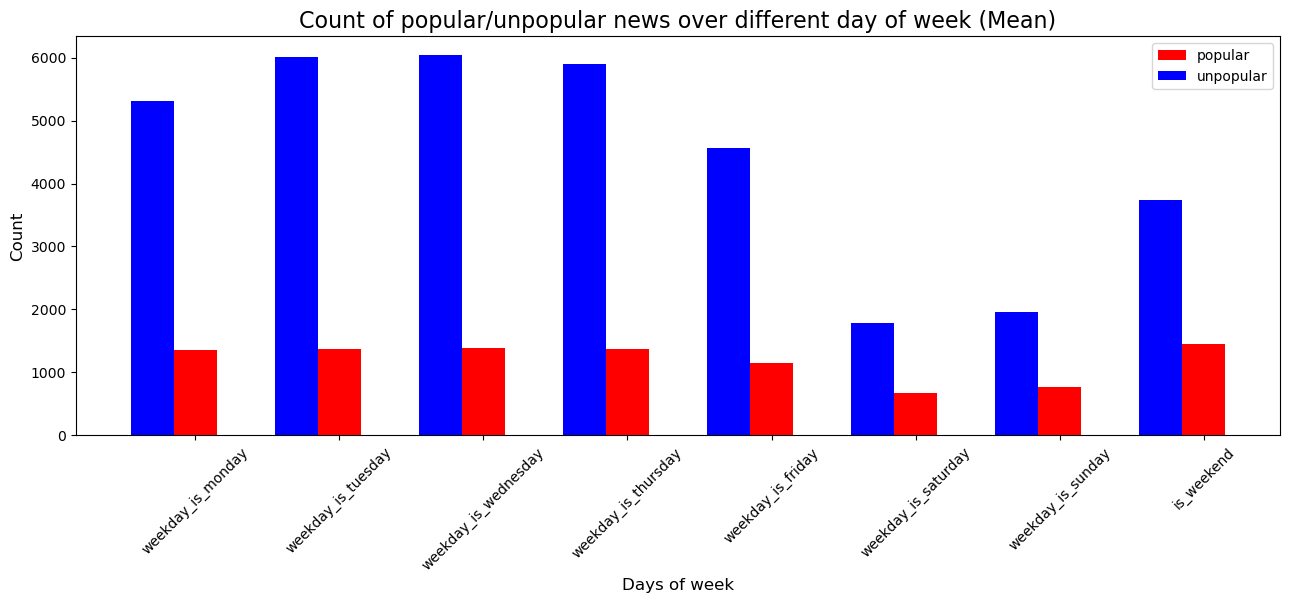

In [31]:
Unpop = df2[df2['shares'] < a]
Pop = df2[df2['shares'] >= a]
Unpop_day = Unpop[Weekday].sum().values
Pop_day = Pop[Weekday].sum().values

fig = plt.figure(figsize=(13, 5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize=16)
plt.bar(np.arange(len(Weekday)), Pop_day, width=0.3, align="center", color='r', label="popular")
plt.bar(np.arange(len(Weekday)) - 0.3, Unpop_day, width=0.3, align="center", color='b', label="unpopular")
plt.xticks(np.arange(len(Weekday)), Weekday)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of week", fontsize=12)

plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

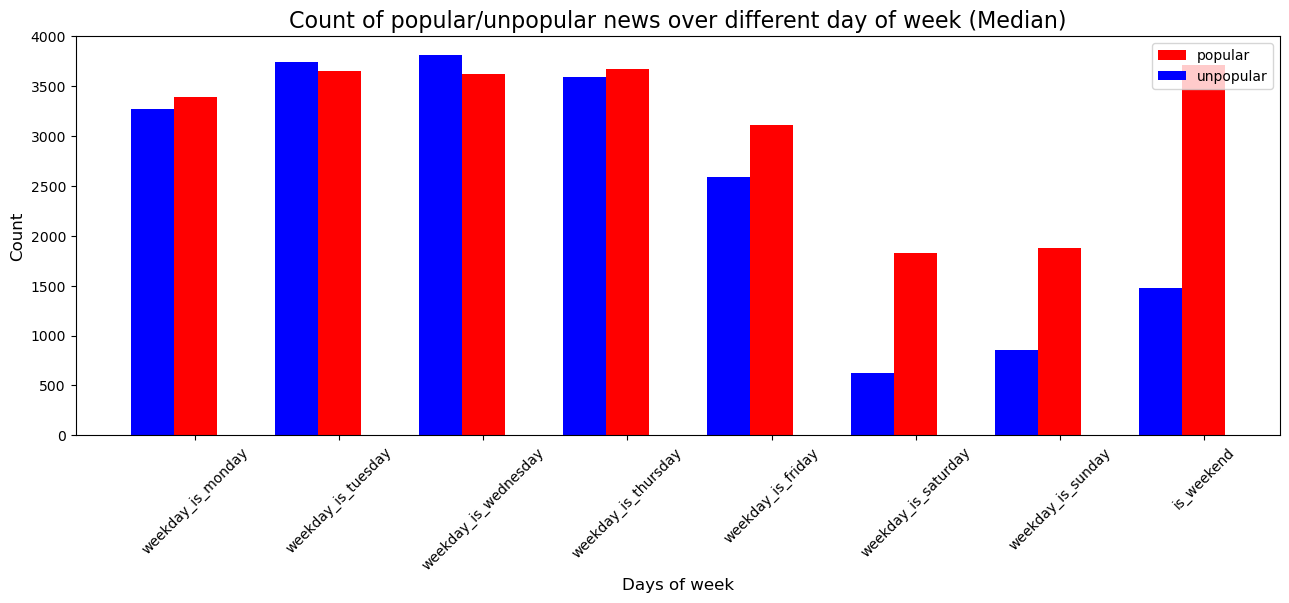

In [32]:
Unpop2 = df2[df2['shares'] < b]
Pop2 = df2[df2['shares'] >= b]
Unpop_day2 = Unpop2[Weekday].sum().values
Pop_day2 = Pop2[Weekday].sum().values
fig = plt.figure(figsize=(13, 5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize=16)
plt.bar(np.arange(len(Weekday)), Pop_day2, width=0.3, align="center", color='r', label="popular")
plt.bar(np.arange(len(Weekday)) - 0.3, Unpop_day2, width=0.3, align="center", color='b', label="unpopular")
plt.xticks(np.arange(len(Weekday)), Weekday)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of week", fontsize=12)

plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [33]:
Data_channel = df2.columns.values[11:17]
print(Data_channel)

['data_channel_is_lifestyle' 'data_channel_is_entertainment'
 'data_channel_is_bus' 'data_channel_is_socmed' 'data_channel_is_tech'
 'data_channel_is_world']


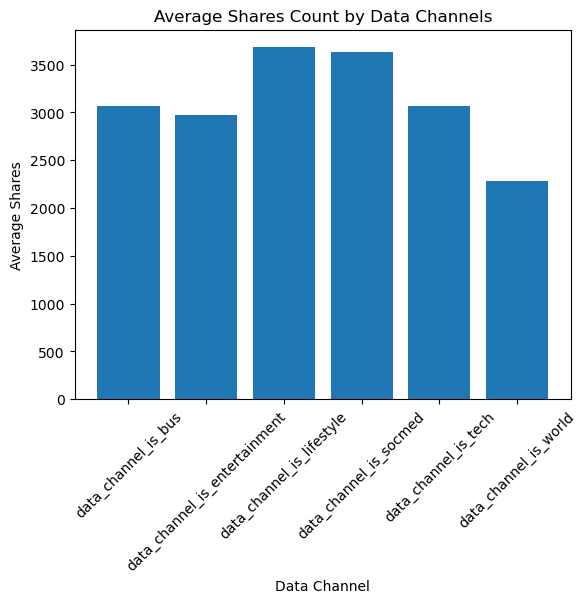

In [34]:
# Melt the DataFrame to create 'data_channel' category
df_melted = df2.melt(id_vars='shares', value_vars=Data_channel, var_name='data_channel', value_name='value')
df_melted = df_melted[df_melted['value'] == 1]

# Group by 'data_channel' and compute the mean of 'shares'
avg_shares_by_channel = df_melted.groupby('data_channel')['shares'].mean().reset_index()

# Plot the result
plt.bar(avg_shares_by_channel['data_channel'], avg_shares_by_channel['shares'])
plt.xlabel('Data Channel')
plt.ylabel('Average Shares')
plt.title('Average Shares Count by Data Channels')
plt.xticks(rotation=45)
plt.show()

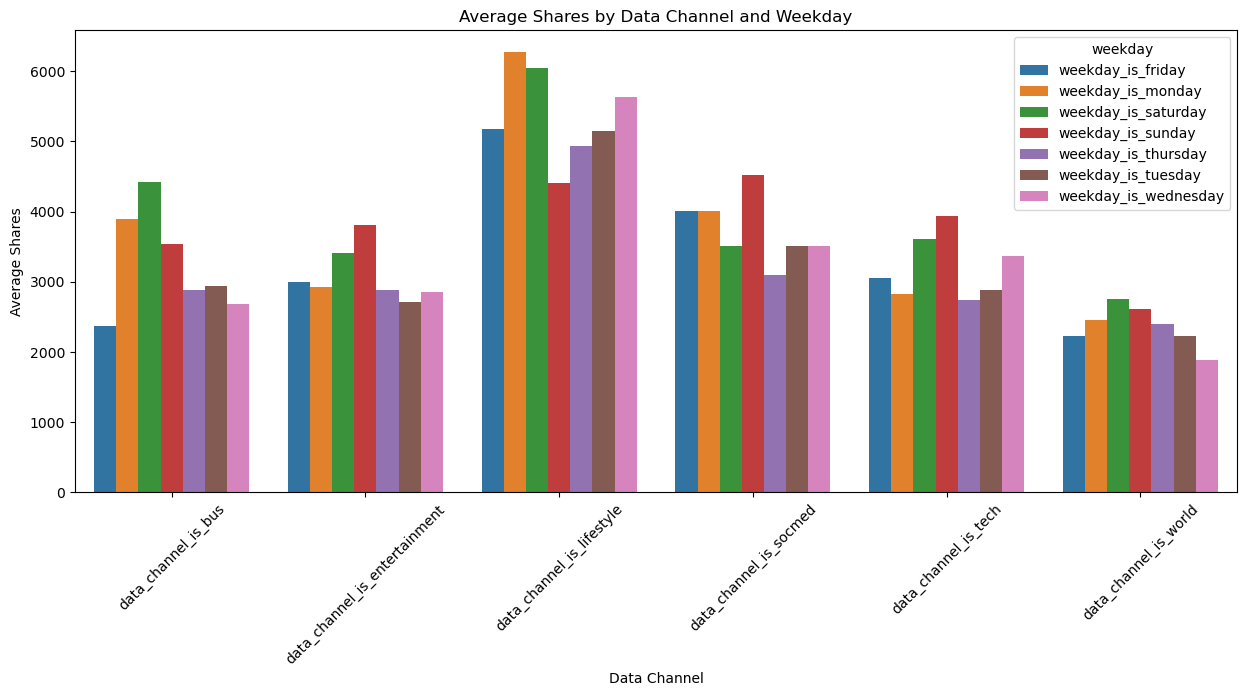

In [35]:
# Convert data_channel columns into a single column
df2['data_channel'] = df2[df2.columns.values[11:17]].idxmax(axis=1)

# Convert weekday columns into a single column
df2['weekday'] = df2[df2.columns.values[29:37]].idxmax(axis=1)

# Now group by these new columns
average_shares = df2.groupby(['data_channel', 'weekday'])['shares'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='data_channel', y='shares', hue='weekday', data=average_shares)
plt.title('Average Shares by Data Channel and Weekday')
plt.xlabel('Data Channel')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)
plt.show()


In my Exploratory Data Analysis (EDA) of this dataset, I started by identifying and examining the numerical and categorical variables. The dataset contains a diverse range of features, from text attributes like the number of words in the title (n_tokens_title) and content (n_tokens_content), to engagement metrics like the number of shares (shares).

I specifically focused on numerical variables such as n_unique_tokens, n_non_stop_words, num_hrefs (number of hyperlinks in the content), and various others. For these variables, I generated histograms and box plots to understand their distributions and identify any outliers. For instance, I noticed significant variation in variables like n_non_stop_words and n_non_stop_unique_tokens, with some extreme values suggesting the presence of outliers.

To systematically identify outliers, I employed the Interquartile Range (IQR) method. This approach helped me pinpoint columns with a high number of outliers, such as kw_max_max and num_imgs. Outlier analysis is crucial as these values can significantly impact any statistical analyses or machine learning models I might develop using this data.

Additionally, I explored categorical variables like data_channel_is_lifestyle, data_channel_is_entertainment, and various days of the week. Understanding how these categorical variables interact with our target variable (shares) is important for insights into what drives engagement.

I also looked at the correlation between different numerical variables using a heatmap. This visualization helped me understand how these variables are interrelated. For instance, there might be a strong correlation between the length of the content and the number of images or videos it contains.

Furthermore, I delved into how different variables might influence the popularity of an article. I split the dataset into popular and unpopular articles based on the mean and median number of shares. Then, I analyzed the distribution of popular and unpopular articles across different days of the week and various data channels. This analysis revealed interesting patterns, like which days or content types tend to have more popular articles.

In summary, my EDA process involved a thorough investigation of the dataset, employing various statistical and visualization techniques. This exploration helped me gain valuable insights into the data, guiding my future steps in modeling or deeper analysis.

# Data Preparation:

My main objective was to transform the data into a format that would be more suitable for machine learning algorithms.

Creating a Target Variable: I started by calculating the median value of the "shares" attribute, which I used to define three categories for share levels: low, medium, and high. This categorization was based on whether the number of shares was below, within, or above 1.5 times the median value. I then created a new column share_level in the dataset to store these categories.

Removing the Original Shares Column: Since my analysis now focuses on the categorized share levels, I removed the original "shares" column. This step helps to avoid any direct influence of the actual share count on the predictive modeling later.

Outlier Treatment: I noticed that certain columns like kw_max_max, avg_positive_polarity, LDA_01, etc., had outliers. To handle these, I calculated the Z-scores for these columns and filtered out rows where the Z-score was beyond 3 standard deviations. This step is crucial as outliers can skew the results of statistical analyses and machine learning models.

Visualizing the Cleaned Data: After removing the outliers, I plotted histograms and box plots for these columns again to check the distribution of data. This visualization confirmed that the data now had fewer extreme values, making it more robust for analysis.

Data Summary: Lastly, I used df2.describe() to get a summary of the cleaned dataset. This gave me insights into the mean, standard deviation, minimum, and maximum values across all columns, post-cleaning. Such summaries are useful to understand the general characteristics of the data, ensuring that it's ready for the next steps in the analysis or modeling process.

Throughout this process, I ensured that the transformations and cleaning steps were aligned with the goals of my analysis. My focus was on preparing a dataset that would be suitable for building a predictive model, possibly to forecast the share levels of articles based on their content and other attributes. The categorization of shares into 'low', 'medium', and 'high' is particularly significant as it converts a regression problem into a classification one, which can be more interpretable in certain contexts.

In [36]:
# Step 1: Calculate the median value for the "shares" attribute
median_shares = df2['shares'].median()

# Step 2: Define the bounds for "low", "medium", and "high" share levels
low_bound = 0.5 * median_shares
high_bound = 1.5 * median_shares

# Step 3: Create the "share_level" column
df2['share_level'] = 'low' # Default to low
df2.loc[(df2['shares'] > low_bound) & (df2['shares'] <= high_bound), 'share_level'] = 'medium'
df2.loc[df2['shares'] > high_bound, 'share_level'] = 'high'

# Step 4: Remove the "shares" attribute
df2.drop(columns=['shares'], inplace=True)

In [37]:
columns_list = df2.columns.tolist()
columns_list

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',

In [38]:
# Create a copy of the DataFrame to avoid modifying the original
high_outliers_filtered = high_outliers.copy()

# Columns to be checked for outliers
columns_to_check = ['kw_max_max','avg_positive_polarity','LDA_01','rate_positive_words','global_subjectivity','max_positive_polarity','average_token_length','max_negative_polarity']

# Loop over each column and remove outliers
for col in columns_to_check:
    # Calculate the Z-scores for the column
    z_scores = zscore(df[col])
    
    # Get the indices of the rows that have Z-scores within 3 standard deviations from the mean
    # (You can adjust this threshold depending on your needs)
    valid_indices = (abs(z_scores) < 3)
    
    # Replace the original column values with the filtered ones
    df2 = df2[valid_indices]

# Show the DataFrame after removing outliers
df2.head()

C:\Users\vijay\AppData\Local\Temp\ipykernel_12232\3756287841.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[valid_indices]
C:\Users\vijay\AppData\Local\Temp\ipykernel_12232\3756287841.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[valid_indices]
C:\Users\vijay\AppData\Local\Temp\ipykernel_12232\3756287841.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[valid_indices]
C:\Users\vijay\AppData\Local\Temp\ipykernel_12232\3756287841.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[valid_indices]
C:\Users\vijay\AppData\Local\Temp\ipykernel_12232\3756287841.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[valid_indices]
C:\Users\vijay\AppData\Local\Temp\ipykernel_12232\3756287841.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
3075             5.0             230.0         0.677130               1.0   
3076            12.0             133.0         0.766917               1.0   
3079            13.0             239.0         0.601732               1.0   
3080            11.0             621.0         0.479608               1.0   
3082            10.0             955.0         0.512568               1.0   

      n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
3075                  0.826772        1.0             1.0       0.0   
3076                  0.813187        1.0             1.0       0.0   
3079                  0.716216        5.0             2.0       1.0   
3080                  0.584687       12.0             3.0      26.0   
3082                  0.701599        5.0             1.0       0.0   

      num_videos  average_token_length  ...  avg_negative_polarity  \
3075         2.0              4.569565  ...              -0.183333   
3076         1.0              4.593985  ...               0.000000   
3079         0.0              4.527197  ...              -0.187500   
3080         1.0              4.879227  ...              -0.298333   
3082        26.0              4.481675  ...              -0.442229   

      min_negative_polarity  max_negative_polarity  title_subjectivity  \
3075              -0.316667                 -0.050                 0.2   
3076               0.000000                  0.000                 0.6   
3079              -0.312500                 -0.125                 0.0   
3080              -0.400000                 -0.200                 0.0   
3082              -1.000000                 -0.050                 0.0   

      title_sentiment_polarity  abs_title_subjectivity  \
3075                       0.3                     0.3   
3076                      -0.3                     0.1   
3079                       0.0                     0.5   
3080                       0.0                     0.5   
3082                       0.0                     0.5   

      abs_title_sentiment_polarity                   data_channel  \
3075                           0.3  data_channel_is_entertainment   
3076                           0.3  data_channel_is_entertainment   
3079                           0.0           data_channel_is_tech   
3080                           0.0  data_channel_is_entertainment   
3082                           0.0      data_channel_is_lifestyle   

                weekday  share_level  
3075  weekday_is_friday         high  
3076  weekday_is_friday       medium  
3079  weekday_is_friday       medium  
3080  weekday_is_friday       medium  
3082  weekday_is_friday         high  

[5 rows x 61 columns]

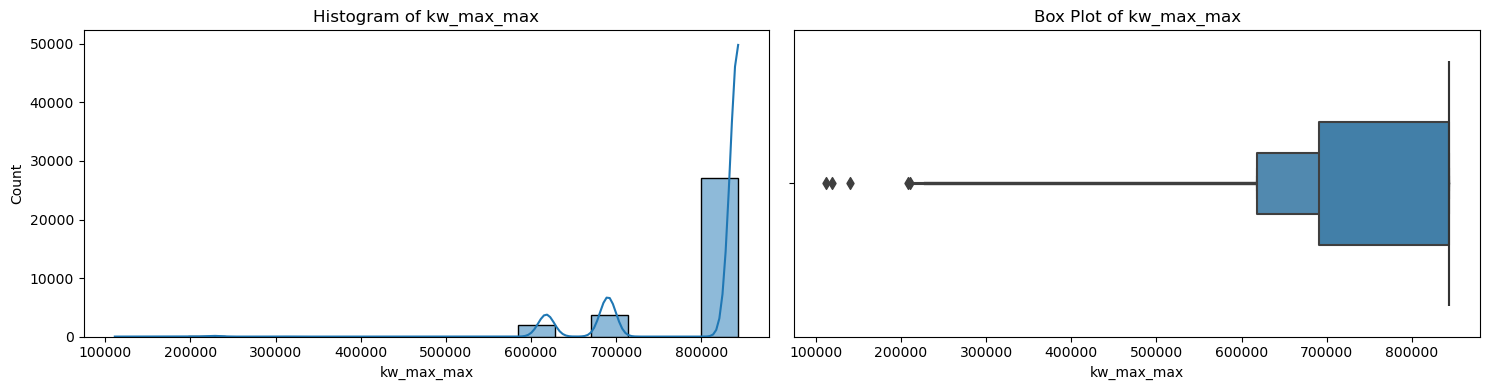

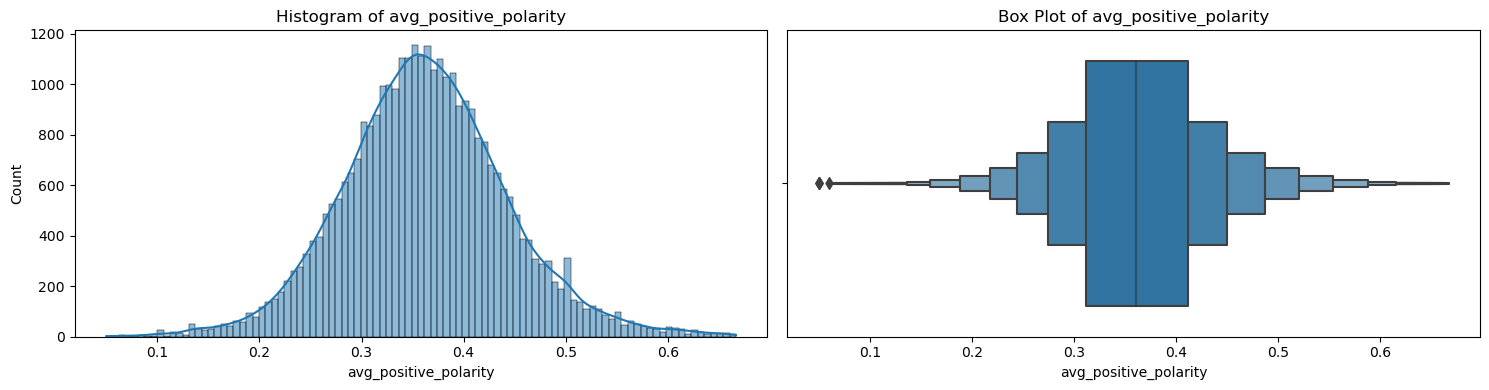

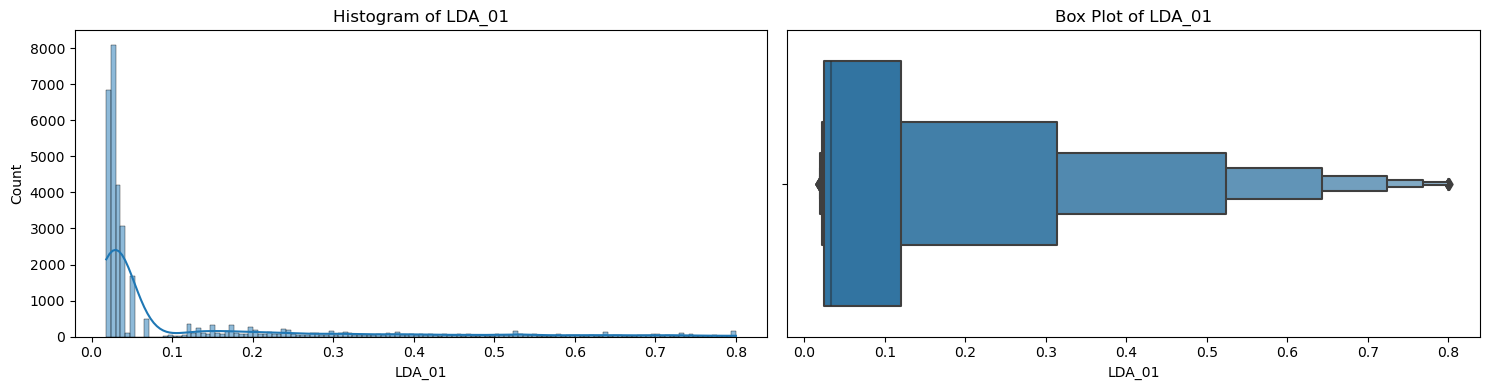

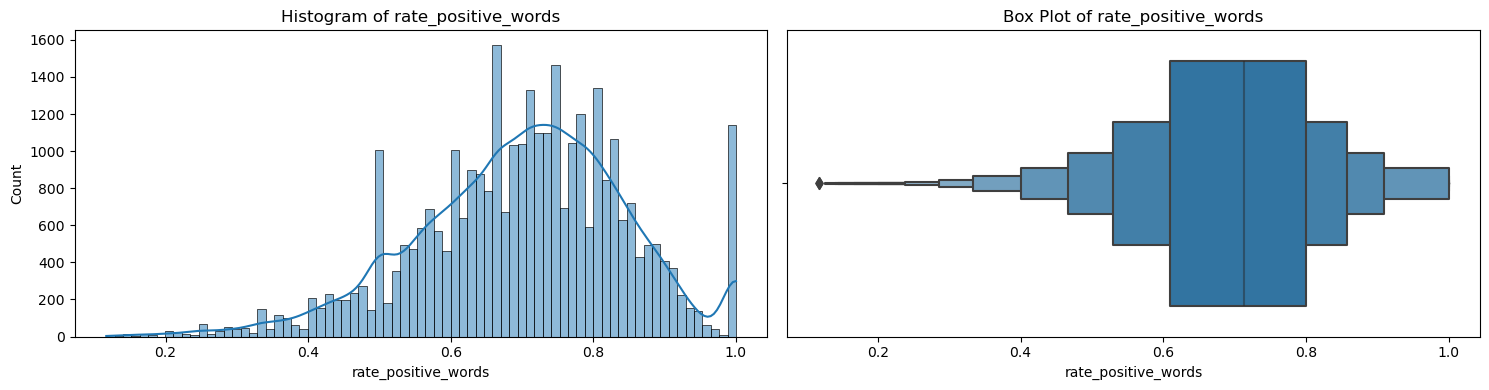

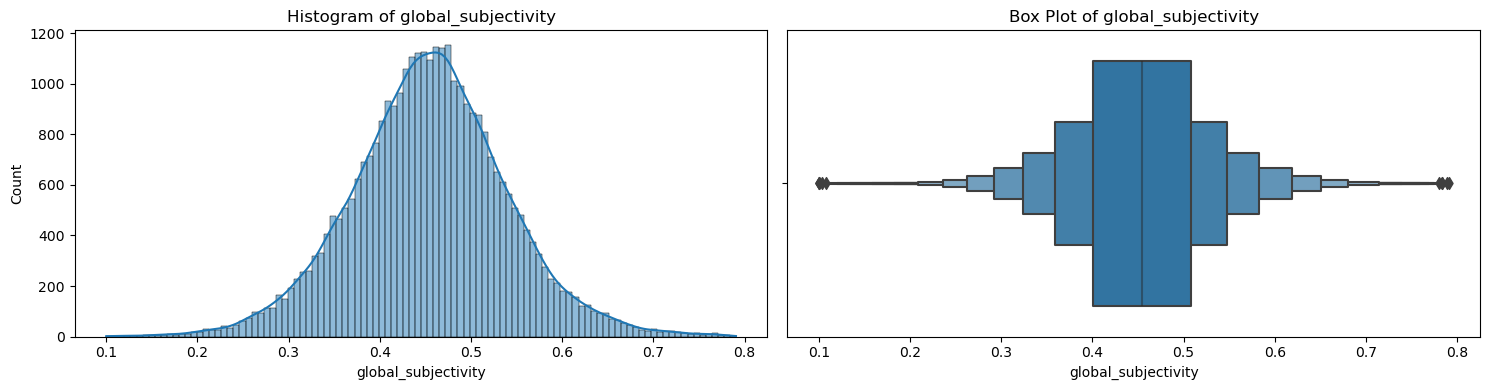

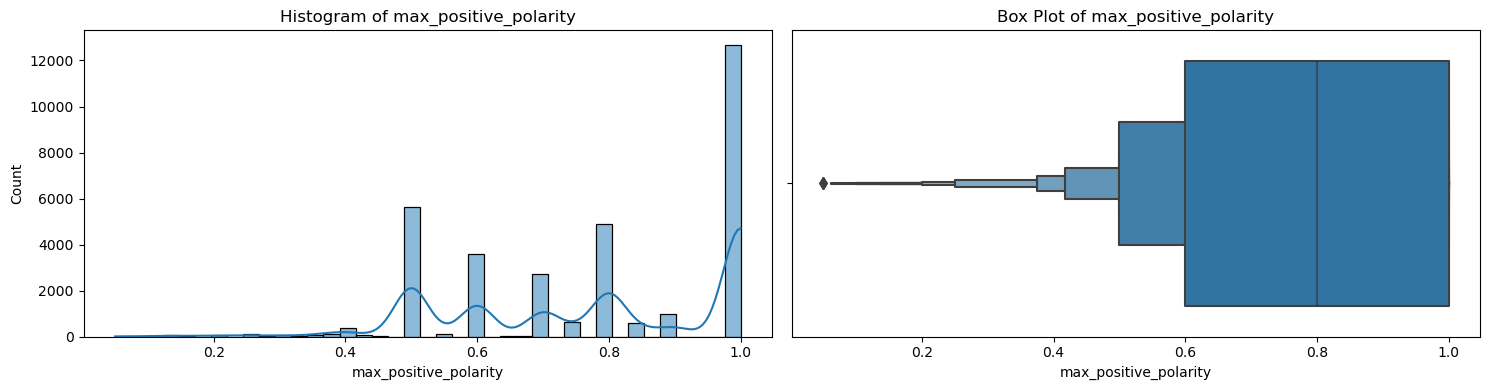

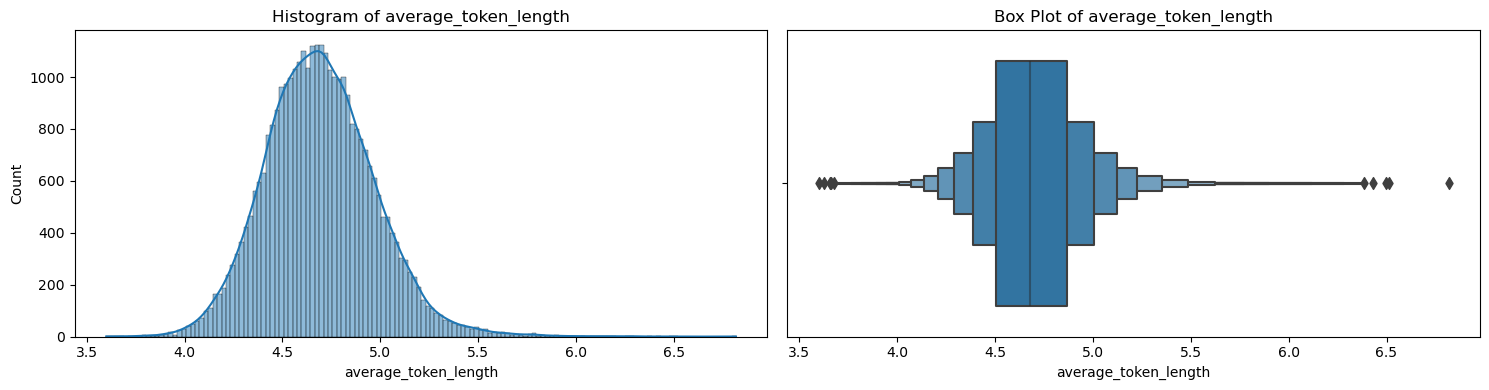

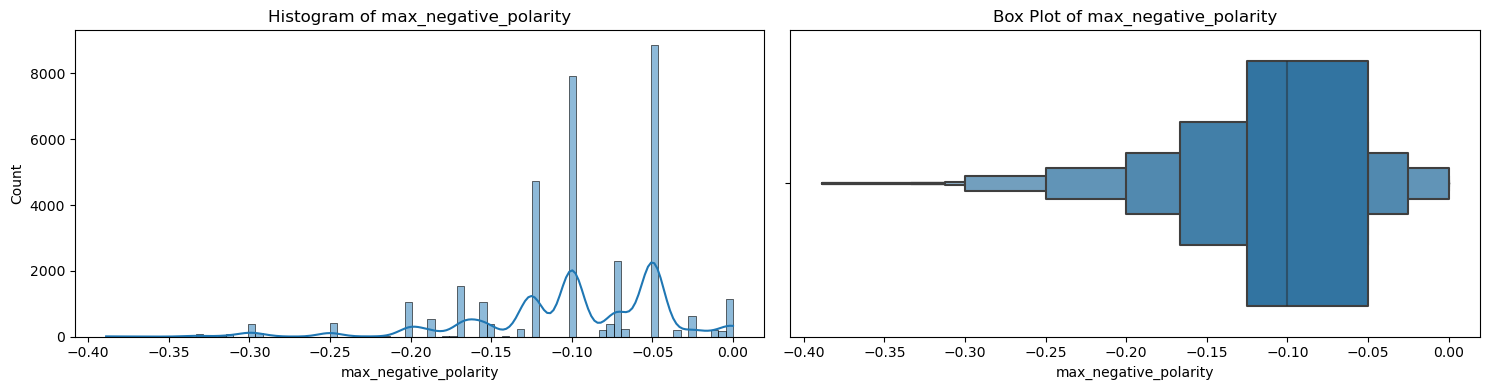

In [39]:
clean_outliers = df2[['kw_max_max','avg_positive_polarity','LDA_01','rate_positive_words','global_subjectivity','max_positive_polarity','average_token_length','max_negative_polarity']]

for col in clean_outliers.columns:
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    plt.title('Histogram of ' + col)
    sns.histplot(x = clean_outliers[col], kde = True)

    plt.subplot(1,2,2)
    plt.title('Box Plot of ' + col)
    sns.boxenplot(x = clean_outliers[col])

    plt.tight_layout()
    plt.show()

In [40]:
df2.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    32990.000000      32990.000000     32990.000000      3.299000e+04   
mean        10.414580        582.690330         0.541125      1.000000e+00   
std          2.119621        474.345866         0.099300      3.630299e-09   
min          2.000000         27.000000         0.114964      9.999999e-01   
25%          9.000000        274.000000         0.474340      1.000000e+00   
50%         10.000000        444.000000         0.537859      1.000000e+00   
75%         12.000000        751.000000         0.603774      1.000000e+00   
max         23.000000       8474.000000         1.000000      1.000000e+00   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              32990.000000  32990.000000    32990.000000  32990.000000   
mean                   0.689217     11.591785        3.436072      4.641467   
std                    0.098055     11.495384        3.812462      8.373433   
min                    0.129263      0.000000        0.000000      0.000000   
25%                    0.629831      5.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.751220     14.000000        4.000000      4.000000   
max                    1.000000    187.000000      116.000000    128.000000   

         num_videos  average_token_length  ...  avg_positive_polarity  \
count  32990.000000          32990.000000  ...           32990.000000   
mean       1.267627              4.693015  ...               0.362595   
std        4.079004              0.278999  ...               0.080276   
min        0.000000              3.600000  ...               0.050000   
25%        0.000000              4.503557  ...               0.311365   
50%        0.000000              4.680771  ...               0.360751   
75%        1.000000              4.866951  ...               0.411385   
max       91.000000              6.816754  ...               0.666667   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
count           32990.000000           32990.000000           32990.000000   
mean                0.095687               0.781692              -0.258815   
std                 0.064242               0.209685               0.107894   
min                 0.033333               0.050000              -0.775000   
25%                 0.050000               0.600000              -0.322222   
50%                 0.100000               0.800000              -0.253125   
75%                 0.100000               1.000000              -0.191621   
max                 0.600000               1.000000               0.000000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
count           32990.000000           32990.000000        32990.000000   
mean               -0.539614              -0.097991            0.276444   
std                 0.280938               0.058442            0.321832   
min                -1.000000              -0.388889            0.000000   
25%                -0.750000              -0.125000            0.000000   
50%                -0.500000              -0.100000            0.100000   
75%                -0.300000              -0.050000            0.500000   
max                 0.000000               0.000000            1.000000   

       title_sentiment_polarity  abs_title_subjectivity  \
count              32990.000000            32990.000000   
mean                   0.069517                0.343579   
std                    0.260945                0.188427   
min                   -1.000000                0.000000   
25%                    0.000000                0.166667   
50%                    0.000000                0.500000   
75%                    0.136364                0.500000   
max                    1.000000                0.500000   

       abs_title_sentim

# Feature Selection 

In [41]:
# list of numerical variables
num_cols = ['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words',
            'n_non_stop_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos',
            'average_token_length','num_keywords','kw_min_min','kw_max_min','kw_avg_min',
            'kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg',
            'self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess',
            'LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','global_subjectivity','global_sentiment_polarity',
            'global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words',
            'avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity',
            'min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity',
            'abs_title_subjectivity','abs_title_sentiment_polarity']

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separate target variable
X = df2[num_cols]
y = df2['share_level']

# Create the RFE model and select the top k attributes
model = LogisticRegression(solver='liblinear') 
selector = RFE(model, n_features_to_select=10) 
selector = selector.fit(X, y)

# Get columns to keep and create a new dataframe with those only
cols = selector.get_support(indices=True)
selected_features_df2 = df2.iloc[:, cols]

# Print the names of the selected features
selected_columns_rfe = [num_cols[i] for i in cols]
print("Selected features:", selected_columns_rfe)

Selected features: ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'kw_min_min', 'kw_min_avg', 'kw_avg_avg']


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Separate target variable
X = df2[num_cols] 
y = df2['share_level']

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': num_cols, 
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

selected_features_rf = features_df['Feature'].head(10) # Select top 10 features

print("Selected features using intrinsic method (Random Forest):")
print(selected_features_rf)

Selected features using intrinsic method (Random Forest):
19                    kw_avg_avg
18                    kw_max_avg
25                        LDA_02
22    self_reference_avg_sharess
28           global_subjectivity
9           average_token_length
23                        LDA_00
16                    kw_avg_max
24                        LDA_01
27                        LDA_04
Name: Feature, dtype: object


In [44]:
# Convert the target variable to numeric
y = pd.to_numeric(df2['share_level'], errors='coerce')

# Drop any rows with NaN values in y
X = df2[num_cols]
y = y.dropna()

# Calculate the absolute correlation with the target variable
correlations = X.apply(lambda x: x.corr(y)).abs()

# Select top features based on correlation
selected_features_cr = correlations.nlargest(10)  # Select top 10 features

# Print selected features
print("Selected features based on correlation:")
print(selected_features_cr.index.tolist())


Selected features based on correlation:
['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length']


In [45]:
# Convert the selections to sets, excluding any 'nan' or NaN values
selected_columns_rfe_set = set(x for x in selected_columns_rfe if pd.notna(x))
selected_features_rf_set = set(x for x in selected_features_rf if pd.notna(x))
selected_features_cr_set = set(x for x in selected_features_cr if pd.notna(x))

# Find the unique values among the three selections
unique_values = selected_columns_rfe_set | selected_features_rf_set | selected_features_cr_set

print("Unique features across the selections:")
print(unique_values)

Unique features across the selections:
{'average_token_length', 'kw_min_min', 'kw_avg_max', 'num_hrefs', 'LDA_00', 'num_keywords', 'n_tokens_title', 'self_reference_avg_sharess', 'LDA_02', 'n_tokens_content', 'num_videos', 'LDA_01', 'num_imgs', 'kw_max_avg', 'global_subjectivity', 'num_self_hrefs', 'LDA_04', 'kw_min_avg', 'kw_avg_avg'}


In [46]:
print(len(unique_values))

19


In [47]:
num_cols_final = unique_values

num_cols_final

{'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_04',
 'average_token_length',
 'global_subjectivity',
 'kw_avg_avg',
 'kw_avg_max',
 'kw_max_avg',
 'kw_min_avg',
 'kw_min_min',
 'n_tokens_content',
 'n_tokens_title',
 'num_hrefs',
 'num_imgs',
 'num_keywords',
 'num_self_hrefs',
 'num_videos',
 'self_reference_avg_sharess'}

In [48]:
cat_cols2 = df2[['data_channel', 'weekday']]

# Create dummy variables
df2_dummy = pd.get_dummies(cat_cols2, columns=['data_channel', 'weekday'])

# Print the first few rows of the encoded DataFrame
df2_dummy.head()

data_channel_data_channel_is_bus  \
3075                             False   
3076                             False   
3079                             False   
3080                             False   
3082                             False   

      data_channel_data_channel_is_entertainment  \
3075                                        True   
3076                                        True   
3079                                       False   
3080                                        True   
3082                                       False   

      data_channel_data_channel_is_lifestyle  \
3075                                   False   
3076                                   False   
3079                                   False   
3080                                   False   
3082                                    True   

      data_channel_data_channel_is_socmed  data_channel_data_channel_is_tech  \
3075                                False                              False   
3076                                False                              False   
3079                                False                               True   
3080                                False                              False   
3082                                False                              False   

      data_channel_data_channel_is_world  weekday_weekday_is_friday  \
3075                               False                       True   
3076                               False                       True   
3079                               False                       True   
3080                               False                       True   
3082                               False                       True   

      weekday_weekday_is_monday  weekday_weekday_is_saturday  \
3075                      False                        False   
3076                      False                        False   
3079                      False                        False   
3080                      False                        False   
3082                      False                        False   

      weekday_weekday_is_sunday  weekday_weekday_is_thursday  \
3075                      False                        False   
3076                      False                        False   
3079                      False                        False   
3080                      False                        False   
3082                      False                        False   

      weekday_weekday_is_tuesday  weekday_weekday_is_wednesday  
3075                       False                         False  
3076                       False                         False  
3079                       False                         False  
3080                       False                         False  
3082                       False                         False

In [49]:
df2

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
3075              5.0             230.0         0.677130               1.0   
3076             12.0             133.0         0.766917               1.0   
3079             13.0             239.0         0.601732               1.0   
3080             11.0             621.0         0.479608               1.0   
3082             10.0             955.0         0.512568               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
3075                   0.826772        1.0             1.0       0.0   
3076                   0.813187        1.0             1.0       0.0   
3079                   0.716216        5.0             2.0       1.0   
3080                   0.584687       12.0             3.0      26.0   
3082                   0.701599        5.0             1.0       0.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  avg_negative_polarity  \
3075          2.0              4.569565  ...              -0.183333   
3076          1.0              4.593985  ...               0.000000   
3079          0.0              4.527197  ...              -0.187500   
3080          1.0              4.879227  ...              -0.298333   
3082         26.0              4.481675  ...              -0.442229   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...              -0.260000   
39640        48.0              4.405488  ...              -0.211111   
39641         1.0              5.076923  ...              -0.356439   
39642         0.0              4.975073  ...              -0.205246   
39643         2.0              4.471338  ...              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
3075               -0.316667              -0.050000            0.200000   
3076                0.000000               0.000000            0.600000   
3079               -0.312500              -0.125000            0.000000   
3080               -0.400000              -0.200000            0.000000   
3082               -1.000000              -0.050000            0.000000   
...                      ...                    ...                 ...   
39639              -0.500000              -0.125000            0.100000   
39640              -0.400000              -0.100000            0.300000   
39641              -0.800000              -0.166667            0.454545   
39642              -0.500000              -0.012500            0.000000   
39643              -0.200000              -0.200000            0.333333   

       title_sentiment_polarity  abs_title_subjectivity  \
3075                   0.300000                0.300000   
3076                  -0.300000                0.100000   
3079                   0.000000                0.500000   
3080                   0.000000                0.500000   
3082                   0.000000                0.500000   
...                         ...                     ...   
39639                  0.000000       

In [50]:
# ordinal encoding for the target variable

from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories
categories = [['low', 'medium', 'high']]

# Initialize the encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the target variable
df2['share_level_encoded'] = encoder.fit_transform(df2[['share_level']])

# display
df2.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
3075             5.0             230.0         0.677130               1.0   
3076            12.0             133.0         0.766917               1.0   
3079            13.0             239.0         0.601732               1.0   
3080            11.0             621.0         0.479608               1.0   
3082            10.0             955.0         0.512568               1.0   

      n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
3075                  0.826772        1.0             1.0       0.0   
3076                  0.813187        1.0             1.0       0.0   
3079                  0.716216        5.0             2.0       1.0   
3080                  0.584687       12.0             3.0      26.0   
3082                  0.701599        5.0             1.0       0.0   

      num_videos  average_token_length  ...  min_negative_polarity  \
3075         2.0              4.569565  ...              -0.316667   
3076         1.0              4.593985  ...               0.000000   
3079         0.0              4.527197  ...              -0.312500   
3080         1.0              4.879227  ...              -0.400000   
3082        26.0              4.481675  ...              -1.000000   

      max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
3075                 -0.050                 0.2                       0.3   
3076                  0.000                 0.6                      -0.3   
3079                 -0.125                 0.0                       0.0   
3080                 -0.200                 0.0                       0.0   
3082                 -0.050                 0.0                       0.0   

      abs_title_subjectivity  abs_title_sentiment_polarity  \
3075                     0.3                           0.3   
3076                     0.1                           0.3   
3079                     0.5                           0.0   
3080                     0.5                           0.0   
3082                     0.5                           0.0   

                       data_channel            weekday  share_level  \
3075  data_channel_is_entertainment  weekday_is_friday         high   
3076  data_channel_is_entertainment  weekday_is_friday       medium   
3079           data_channel_is_tech  weekday_is_friday       medium   
3080  data_channel_is_entertainment  weekday_is_friday       medium   
3082      data_channel_is_lifestyle  weekday_is_friday         high   

      share_level_encoded  
3075                  2.0  
3076                  1.0  
3079                  1.0  
3080                  1.0  
3082                  2.0  

[5 rows x 62 columns]

In [51]:
# define numerical variables
numerical_vars = df2[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_04',
 'average_token_length', 'global_subjectivity',
 'kw_avg_avg', 'kw_avg_max', 'kw_max_avg', 'kw_min_min',
 'n_tokens_title', 'num_hrefs', 'num_imgs', 'num_keywords',
 'num_self_hrefs', 'num_videos', 'self_reference_avg_sharess']]

# combine dummay variables and numerical variables
df_final1 = pd.concat([numerical_vars, df2_dummy], axis=1)

# add the ordinal encoded target variable
df_final1['share_level_encoded'] = df2['share_level_encoded']
                         
# display
df_final1

LDA_00    LDA_01    LDA_02    LDA_04  average_token_length  \
3075   0.033443  0.034003  0.033406  0.033392              4.569565   
3076   0.138304  0.022948  0.022234  0.204420              4.593985   
3079   0.022255  0.022226  0.357911  0.575384              4.527197   
3080   0.304401  0.493190  0.150850  0.025020              4.879227   
3082   0.025034  0.025260  0.025038  0.025027              4.481675   
...         ...       ...       ...       ...                   ...   
39639  0.025038  0.025001  0.151701  0.773260              4.523121   
39640  0.029349  0.028575  0.231866  0.028575              4.405488   
39641  0.159004  0.025025  0.025207  0.146970              5.076923   
39642  0.040004  0.040003  0.839987  0.040004              4.975073   
39643  0.050001  0.799339  0.050000  0.050001              4.471338   

       global_subjectivity   kw_avg_avg     kw_avg_max   kw_max_avg  \
3075              0.395000  2447.411626   70916.666667  3233.333333   
3076              0.590855  2805.907798   51177.777778  6101.833333   
3079              0.445549  1716.387563   42844.444444  2993.574018   
3080              0.422460  1598.633760   46387.500000  3455.884615   
3082              0.470958  3239.970969   75900.000000  4286.028169   
...                    ...          ...            ...          ...   
39639             0.482679  3031.115764  374962.500000  4004.342857   
39640             0.564374  3411.660830  192985.714286  5470.168651   
39641             0.510296  4206.439195  295850.000000  6880.687034   
39642             0.358578  1777.895883  254600.000000  3384.316871   
39643             0.517893  3296.909481  366200.000000  3613.512953   

       kw_min_min  ...  data_channel_data_channel_is_tech  \
3075        217.0  ...                              False   
3076        217.0  ...                              False   
3079        217.0  ...                               True   
3080        217.0  ...                              False   
3082        217.0  ...                              False   
...           ...  ...                                ...   
39639        -1.0  ...                               True   
39640        -1.0  ...                              False   
39641        -1.0  ...                              False   
39642        -1.0  ...                              False   
39643        -1.0  ...                              False   

       data_channel_data_channel_is_world  weekday_weekday_is_friday  \
3075                                False                       True   
3076                                False                       True   
3079                                False                       True   
3080                                False                       True   
3082                                False                       True   
...                                   ...                        ...   
39639                               False                      False   
39640                               False                      False   
39641                               False                      False   
39642                                True                      False   
39643                               False                      False   

       weekday_weekday_is_monday  weekday_weekday_is_saturday  \
3075                       False                        False   
3076                       False                        False   
3079                       False                        False   
3080                       False                        False   
3082                       False                        False   
...                          ...                          ...   
39639                      False                        False   
39640                      False                        False   
39641                      False                        False   
39642                      False                       

In [52]:
# import the library for transformation
from sklearn.preprocessing import PowerTransformer

# copy the data to transform
df_final2 = df_final1.copy()

# Create the transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# List of columns to transform
columns_to_transform = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_04',
 'average_token_length', 'global_subjectivity',
 'kw_avg_avg', 'kw_avg_max', 'kw_max_avg', 'kw_min_min',
 'n_tokens_title', 'num_hrefs', 'num_imgs', 'num_keywords',
 'num_self_hrefs', 'num_videos', 'self_reference_avg_sharess']

# Apply the transformation to each column
for col in columns_to_transform:
    # Reshape the column to fit the transformer
    df2_array = df_final2[col].values.reshape(-1, 1)
    # Transform the column
    transformed_data = yeo_johnson_transformer.fit_transform(df2_array)
    # Replace the original column with the transformed column
    df_final2[col] = transformed_data

df_final2.head()

LDA_00    LDA_01    LDA_02    LDA_04  average_token_length  \
3075 -0.664574 -0.461870 -0.787337 -0.835247             -0.402789   
3076  0.394430 -0.769557 -0.911822  0.362491             -0.310561   
3079 -0.825548 -0.791091  1.015353  1.330410             -0.564962   
3080  1.162392  1.901530  0.177931 -0.920550              0.703730   
3082 -0.784448 -0.701830 -0.879906 -0.920476             -0.742320   

      global_subjectivity  kw_avg_avg  kw_avg_max    kw_max_avg  kw_min_min  \
3075            -0.692154   -0.614045   -2.811510 -2.775558e-17    2.084437   
3076             1.587656   -0.140130   -3.464368  0.000000e+00    2.084437   
3079            -0.101197   -2.010476   -3.810105 -5.551115e-17    2.084437   
3080            -0.370894   -2.321955   -3.656399  0.000000e+00    2.084437   
3082             0.195163    0.324030   -2.672548  0.000000e+00    2.084437   

      ...  data_channel_data_channel_is_tech  \
3075  ...                              False   
3076  ...                              False   
3079  ...                               True   
3080  ...                              False   
3082  ...                              False   

      data_channel_data_channel_is_world  weekday_weekday_is_friday  \
3075                               False                       True   
3076                               False                       True   
3079                               False                       True   
3080                               False                       True   
3082                               False                       True   

      weekday_weekday_is_monday  weekday_weekday_is_saturday  \
3075                      False                        False   
3076                      False                        False   
3079                      False                        False   
3080                      False                        False   
3082                      False                        False   

      weekday_weekday_is_sunday  weekday_weekday_is_thursday  \
3075                      False                        False   
3076                      False                        False   
3079                      False                        False   
3080                      False                        False   
3082                      False                        False   

      weekday_weekday_is_tuesday  weekday_weekday_is_wednesday  \
3075                       False                         False   
3076                       False                         False   
3079                       False                         False   
3080                       False                         False   
3082                       False                         False   

      share_level_encoded  
3075                  2.0  
3076                  1.0  
3079                  1.0  
3080                  1.0  
3082                  2.0  

[5 rows x 31 columns]

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Make a copy of the original dataframe to preserve the initial data
df_final3 = df_final2.copy()

# define target variable 'share_level_encoded'
X = df_final3.drop(columns=['share_level_encoded'])
y = df_final3['share_level_encoded']

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the pipeline with the Random Forest classifier and GridSearchCV for hyperparameter tuning
pipeline = Pipeline([
    ('rf', rf_model),
])

# Define hyperparameters for tuning
param_grid = {
    'rf__n_estimators': [50, 100],          # Number of trees in the forest
    'rf__max_depth': [10, 20],             # Maximum depth of the tree
    'rf__min_samples_split': [2, 5],         # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [2, 4],           # Minimum number of samples required to be at a leaf node
    'rf__max_features': ['sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Create GridSearchCV with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(X, y)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Get feature importances from the best model
feature_importances = pd.Series(best_model.named_steps['rf'].feature_importances_, index=X.columns)

# Sort features by importance in descending order
sorted_features = feature_importances.sort_values(ascending=False)

# Select the top 'k' features based on importance
k = 20 
selected_features = sorted_features.head(k)

# Filter the dataframe to include only the selected features
X_selected = X[selected_features.index]

# Print the selected features and their importances
print("Selected Features:")
print(selected_features)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Selected Features:
kw_avg_avg                                    0.167648
self_reference_avg_sharess                    0.116152
LDA_02                                        0.075700
LDA_00                                        0.058730
LDA_01                                        0.052880
global_subjectivity                           0.052677
kw_avg_max                                    0.052510
num_hrefs                                     0.050517
LDA_04                                        0.046897
average_token_length                          0.046449
num_imgs                                      0.038899
num_self_hrefs                                0.026444
n_tokens_title                                0.023292
kw_min_min                                    0.020602
data_channel_data_channel_is_lifestyle        0.020095
data_channel_data_channel_is_world            0.019841
data_channel_data_channel_is_socmed    

In [54]:
numerical_vars = df_final3[['kw_avg_avg','self_reference_avg_sharess','LDA_02','LDA_00','LDA_01',
                            'global_subjectivity','kw_avg_max','num_hrefs','LDA_04',
                            'average_token_length','num_imgs','num_self_hrefs','n_tokens_title',
                            'kw_min_min','data_channel_data_channel_is_lifestyle',
                            'data_channel_data_channel_is_world','data_channel_data_channel_is_socmed',
                            'num_keywords','data_channel_data_channel_is_entertainment','num_videos',]]

# Create df_final5 with numerical variables and the ordinal encoded target variable
df_final5 = pd.concat([numerical_vars, df_final3['share_level_encoded']], axis=1)

# Display the dataframe
df_final5

kw_avg_avg  self_reference_avg_sharess    LDA_02    LDA_00    LDA_01  \
3075    -0.614045                   -1.872735 -0.787337 -0.664574 -0.461870   
3076    -0.140130                   -0.323900 -0.911822  0.394430 -0.769557   
3079    -2.010476                   -1.872735  1.015353 -0.825548 -0.791091   
3080    -2.321955                   -0.003122  0.177931  1.162392  1.901530   
3082     0.324030                   -0.431922 -0.879906 -0.784448 -0.701830   
...           ...                         ...       ...       ...       ...   
39639    0.113246                    1.936512  0.183141 -0.784391 -0.709331   
39640    0.482499                   -0.026192  0.594751 -0.722106 -0.607905   
39641    1.083960                   -0.217716 -0.877991  0.534116 -0.708635   
39642   -1.860312                   -0.670772  1.607280 -0.575568 -0.310967   
39643    0.377965                   -0.026192 -0.615023 -0.447074  1.935737   

       global_subjectivity  kw_avg_max  num_hrefs    LDA_04  \
3075             -0.692154   -2.811510  -2.339284 -0.835247   
3076              1.587656   -3.464368  -2.339284  0.362491   
3079             -0.101197   -3.810105  -0.630136  1.330410   
3080             -0.370894   -3.656399   0.459004 -0.920550   
3082              0.195163   -2.672548  -0.630136 -0.920476   
...                    ...         ...        ...       ...   
39639             0.331712    0.922462   0.099373  1.527506   
39640             1.280925   -0.651290   0.099373 -0.883915   
39641             0.653096    0.347426   1.313080  0.053109   
39642            -1.119122   -0.009080   0.231174 -0.770202   
39643             0.741416    0.864390  -2.339284 -0.675543   

       average_token_length  ...  num_self_hrefs  n_tokens_title  kw_min_min  \
3075              -0.402789  ...       -0.845227       -2.758284    2.084437   
3076              -0.310561  ...       -0.845227        0.759600    2.084437   
3079              -0.564962  ...       -0.233194        1.206358    2.084437   
3080               0.703730  ...        0.197718        0.302121    2.084437   
3082              -0.742320  ...       -0.845227       -0.167266    2.084437   
...                     ...  ...             ...             ...         ...   
39639             -0.580707  ...        1.224722        0.302121   -0.768041   
39640             -1.046619  ...        1.224722        0.759600   -0.768041   
39641              1.344714  ...       -0.845227       -0.167266   -0.768041   
39642              1.020394  ...       -0.845227       -2.198595   -0.768041   
39643             -0.783056  ...       -0.845227       -0.167266   -0.768041   

       data_channel_data_channel_is_lifestyle  \
3075                                    False   
3076                                    False   
3079                                    False   
3080                                    False   
3082                                     True   
...                                       ...   
39639                                   False   
39640                                   False   
39641                                    True   
39642                                   False   
39643                                   False   

       data_channel_data_channel_is_world  \
3075                                False   
3076                                False   
3079                                False   
3080                                False   
3082                                False   
...                                   ...   
39639                               False   
39640                               False   
39641                               False   
39642                                True   
39643                               False   

       data_channel_data_channel_is_socmed  num_keywords  \
3075                                 False     -0.654935   
3076                                 False      0.918039   
3079                          

I used various techniques to ensure robustness and effectiveness in my selection.

Recursive Feature Elimination (RFE): I started with RFE, using Logistic Regression as the model. RFE helped me in selecting the top 10 attributes which are most influential in predicting the share level. The features selected through RFE were mainly content-based features like the number of words, images, videos, and certain keyword-related features.

Random Forest Classifier: Next, I employed a Random Forest Classifier to determine feature importances intrinsically. This method gave me a different set of top 10 features, focusing more on the keyword averages, LDA topic distributions, and global subjectivity. This highlights the importance of the content's sentiment and topics in determining its shareability.

Correlation with Target Variable: I also calculated the absolute correlation of numerical features with the target variable after converting it to numeric form. This approach allowed me to understand which features have a strong linear relationship with the share level. The top features based on correlation were similar to those identified by RFE.

Combining Selections: To ensure a comprehensive feature set, I combined the unique features selected by RFE, Random Forest, and correlation methods. This gave me a diverse set of 19 features, covering different aspects of the articles.

Categorical Features: I created dummy variables for categorical features like data_channel and weekday. This step is crucial for models that only work with numerical input.

Ordinal Encoding: I used Ordinal Encoding to convert the share_level into a numeric format, preserving the order of categories (low, medium, high). This transformation is important for models that require numerical target variables.

Final Data Preparation: I prepared my final dataset by combining the selected numerical and dummy variables. I also applied a Power Transformer (Yeo-Johnson method) to transform the numerical features, aiming to make the data more Gaussian-like, which can be beneficial for many modeling techniques.

Modeling with Selected Features: I used a Random Forest Classifier within a GridSearchCV pipeline to further refine the selection of features based on their importance. I chose the top 20 features from this model for the final analysis.

Final Dataset for Modeling: My final dataset, df_final5, includes the top 20 features identified through Random Forest, along with the encoded target variable. This dataset is now ready for training predictive models to classify articles into different share levels.

Through this meticulous process, I ensured that the features selected are not only statistically significant but also provide diverse insights into factors affecting the shareability of articles. This approach enhances the likelihood of developing a robust and accurate predictive model.

# PREP DATA REVIEW

share_level
medium    19198
high      10810
low        2982
Name: count, dtype: int64


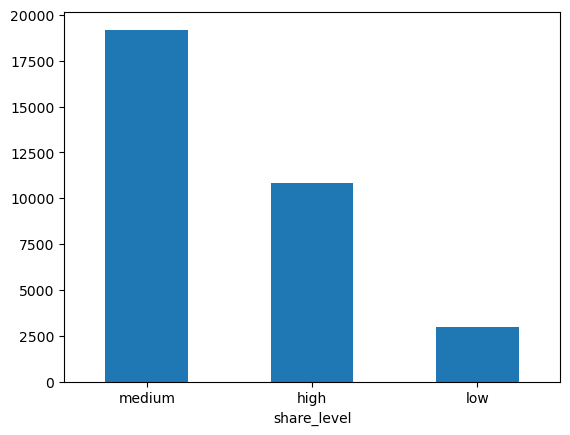

In [55]:
# Summary of the distribution
distribution = df2['share_level'].value_counts()
print(distribution)

# Visualization
distribution.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


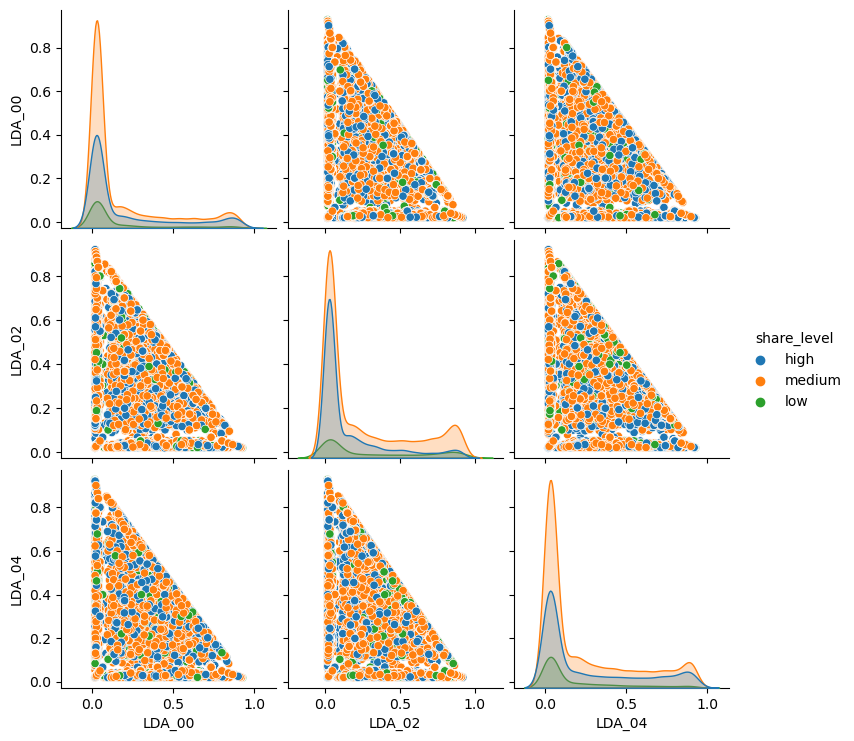

In [56]:
subset_features = ['LDA_00', 'LDA_02', 'LDA_04']
sns.pairplot(df2[subset_features + ['share_level']], hue='share_level', kind='scatter')
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


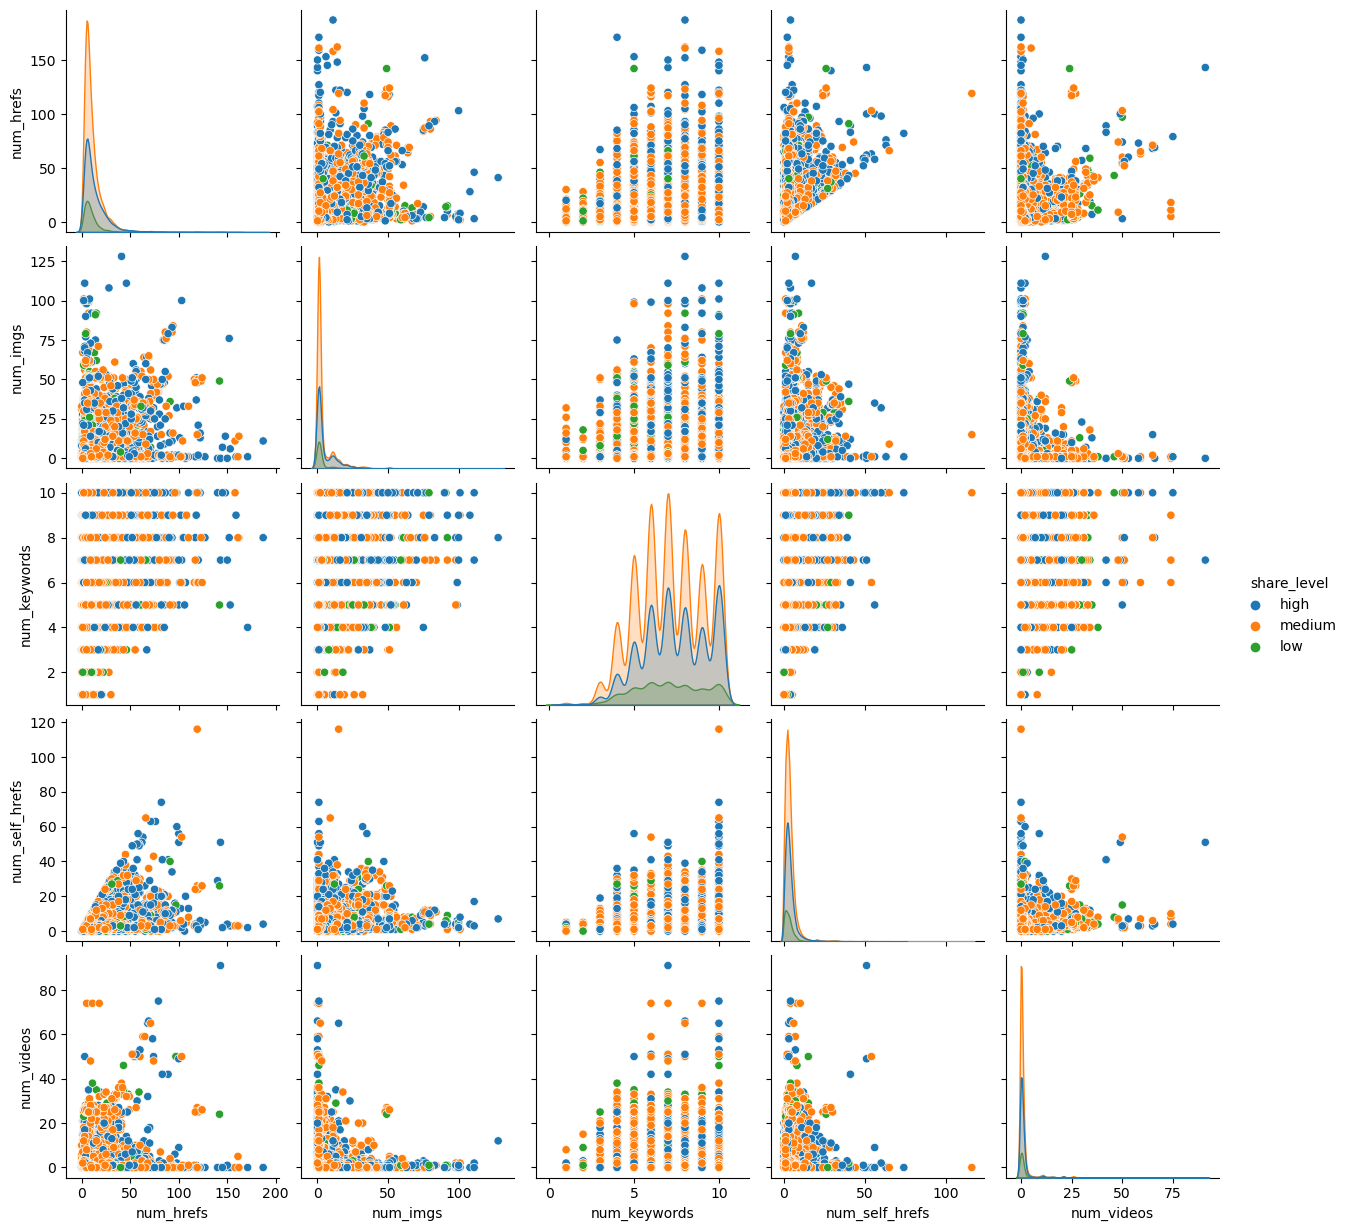

In [57]:
subset_features = ['num_hrefs','num_imgs', 'num_keywords','num_self_hrefs','num_videos',]
sns.pairplot(df2[subset_features + ['share_level']], hue='share_level', kind='scatter')
plt.show()

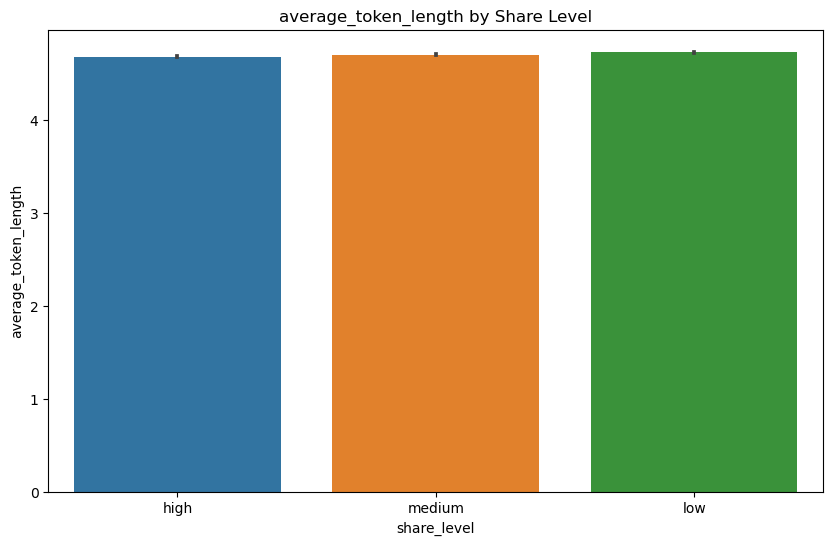

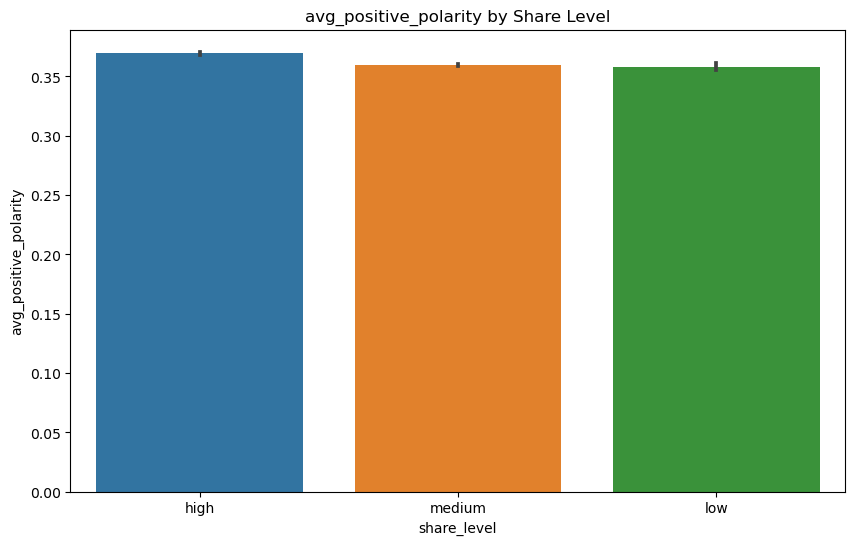

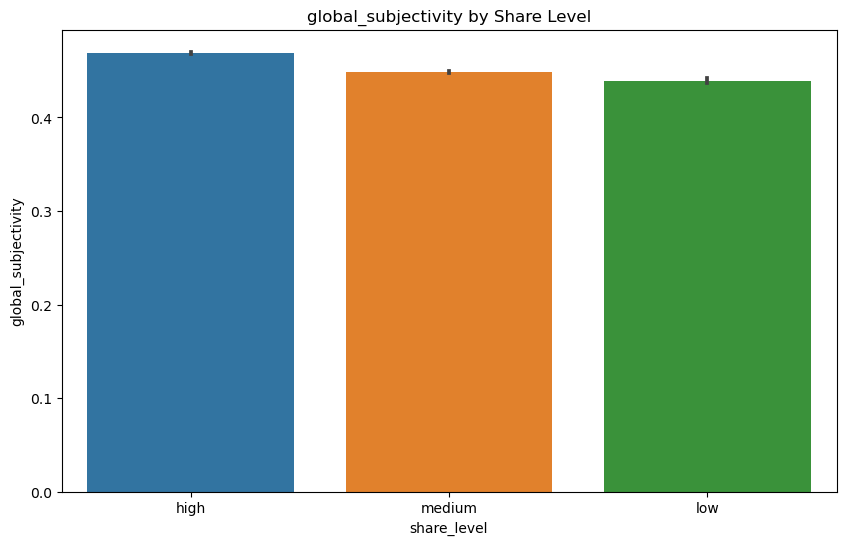

In [58]:
subset_features = ['average_token_length', 'avg_positive_polarity', 'global_subjectivity']

for feature in subset_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='share_level', y=feature, data=df2)
    plt.title(f'{feature} by Share Level')
    plt.show()

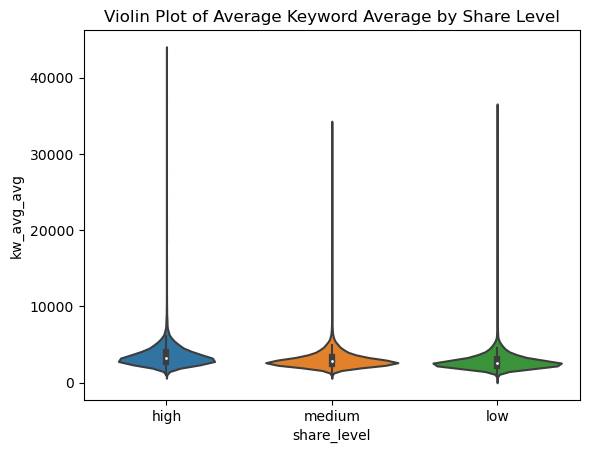

In [59]:
sns.violinplot(x='share_level', y='kw_avg_avg', data=df2)
plt.title('Violin Plot of Average Keyword Average by Share Level')
plt.show()

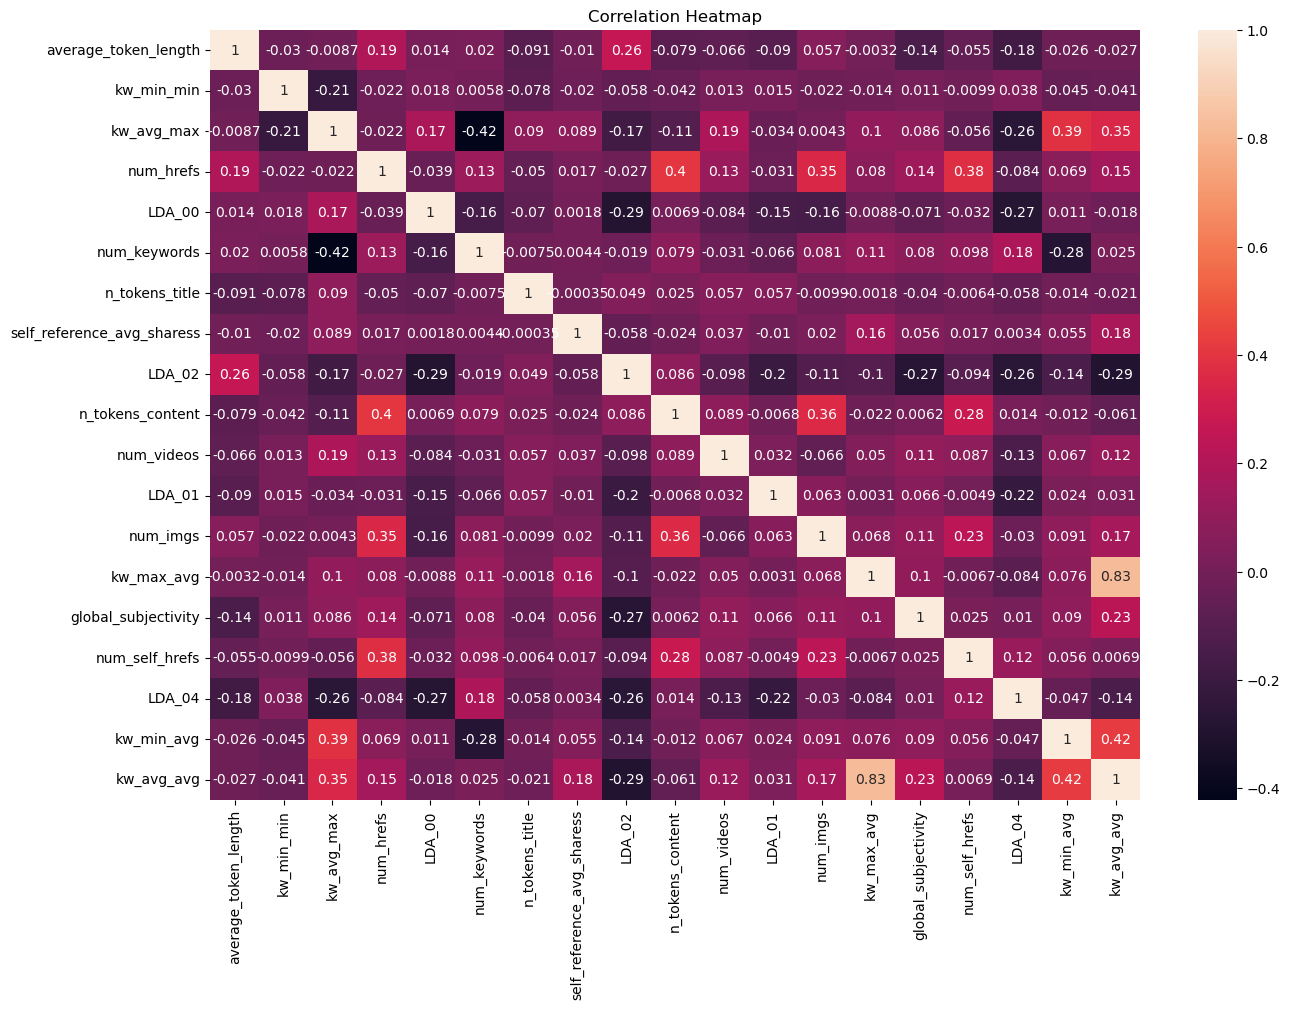

In [61]:
# Convert the set to a list
num_cols_final_list = list(num_cols_final)

# Now use this list to select columns and compute the correlation matrix
correlation_matrix = df2[num_cols_final_list].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

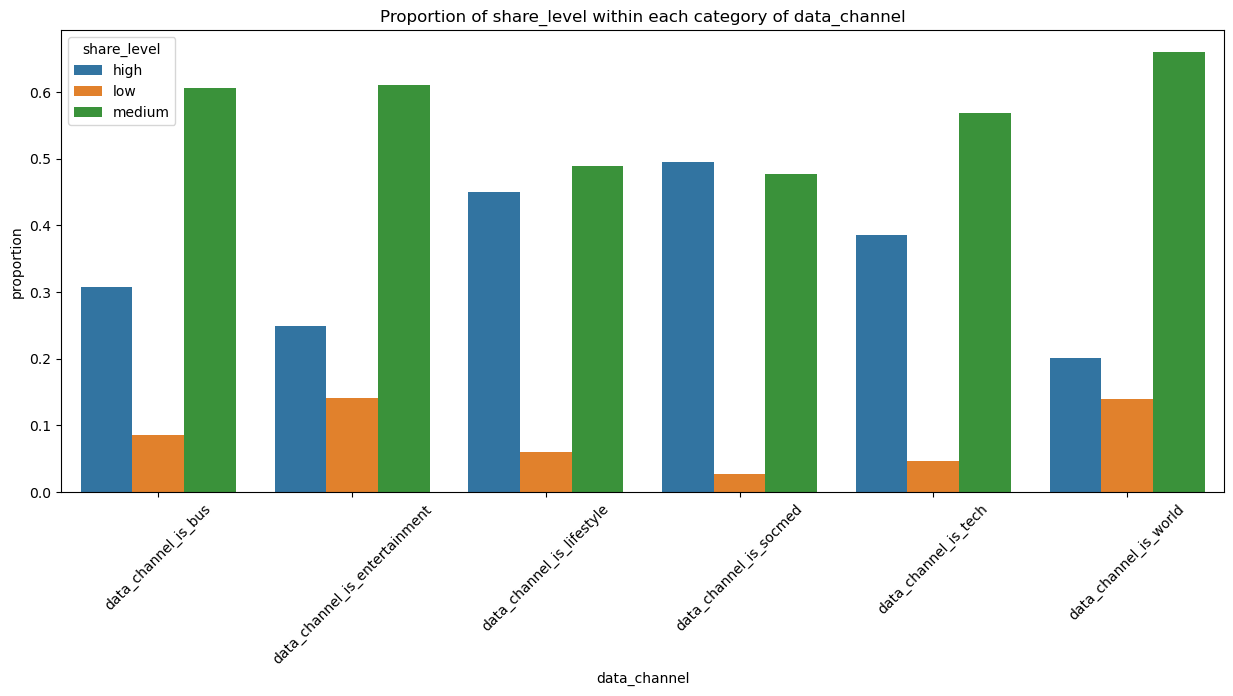

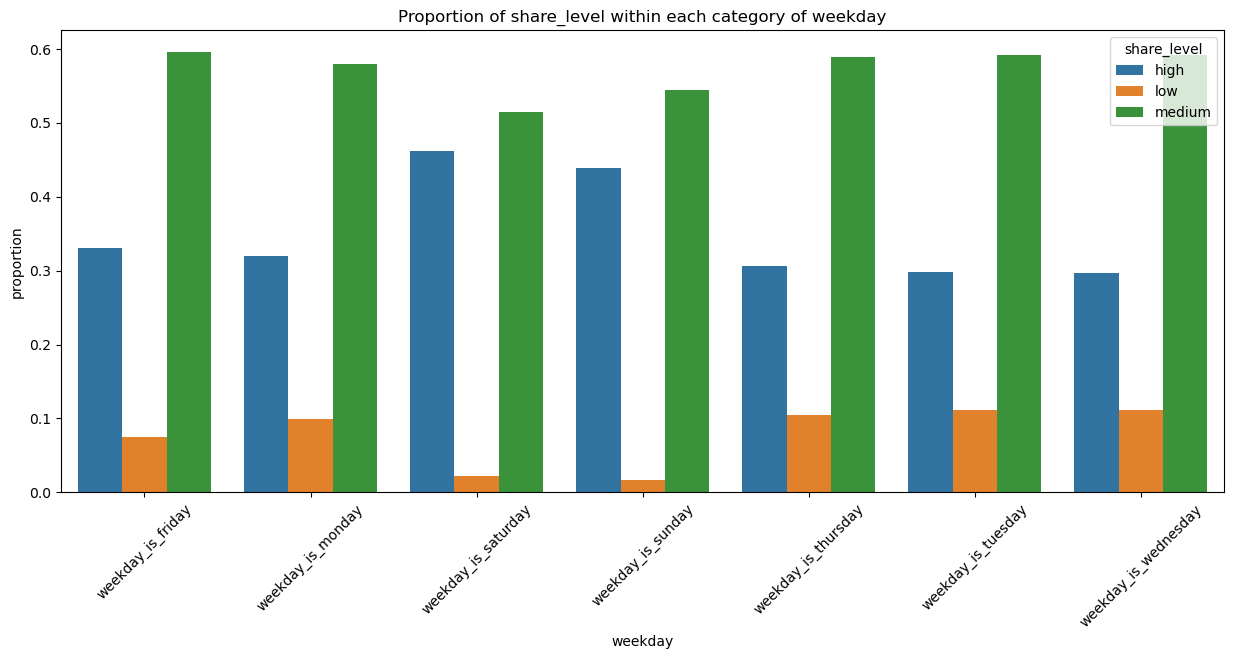

In [62]:
# Merge df2 with the 'share_level' column from df
merged_df = df2[['data_channel', 'weekday']].copy()
merged_df['share_level'] = df2['share_level']

# List of categorical variables
categorical_vars = ['data_channel', 'weekday']

# Loop over categorical variable names and create a plot for each
for var in categorical_vars:
    # Group by the categorical variable and 'share_level', calculate the size of each group,
    # then divide by the total size of the groups for the categorical variable to get the proportion
    proportion = (merged_df.groupby([var, 'share_level']).size() / merged_df.groupby(var).size()).reset_index(name='proportion')
    
    # Create a bar plot of the proportions
    plt.figure(figsize=(15, 6))
    sns.barplot(x=var, y='proportion', hue='share_level', data=proportion)
    plt.title(f'Proportion of share_level within each category of {var}')
    plt.xticks(rotation=45)
    plt.show()

I thoroughly reviewed the data preparation and feature selection process to ensure that my final dataset was ready for predictive modeling.

Distribution Summary: I started by analyzing the distribution of the target variable, share_level, in my dataset (df2). I found that the majority of the articles are categorized as 'medium', followed by 'high' and 'low'. This distribution was visualized using a bar plot, which clearly showed the imbalance among different share levels.

Pairplot Analysis: I used pairplots to visualize the relationships between selected features and the share level. Initially, I focused on LDA topic model features (LDA_00, LDA_02, LDA_04) to see how different topics are distributed across share levels. Then, I analyzed a set of features related to the article structure, such as num_hrefs, num_imgs, and num_videos. These plots provided insights into how these features varied across different share levels.

Bar Plots for Individual Features: I explored individual features like average_token_length, avg_positive_polarity, and global_subjectivity using bar plots. These plots helped me understand the average values of these features across different share levels and offered insights into what might influence an article's shareability.

Violin Plots for Keyword Averages: I created violin plots for kw_avg_avg to visualize the distribution and density of this feature across different share levels. The plots revealed the range and frequency of average keyword averages, offering a more nuanced understanding than simple averages.

Correlation Analysis: I computed the correlation matrix for the selected numerical features (num_cols_final) and visualized it using a heatmap. This step was crucial to identify any strong correlations between features, which could indicate redundancy or multicollinearity.

Categorical Variable Analysis: To understand the impact of categorical variables (data_channel and weekday) on share level, I merged these with the share_level column from df2. I then calculated and visualized the proportion of each share level within each category of these variables. This analysis helped identify if certain days of the week or content channels were more associated with different share levels.

Overall, my review process was comprehensive, taking into account both the distribution and relationships within the data. This thorough examination helped ensure that the dataset was well-prepared and provided valuable insights for the next stage of building predictive models.

# Neural Network Modelling

I proceeded with the neural network modeling for the project. Here's how I approached this step:

Import Libraries: First, I imported necessary libraries for model building and evaluation. This included train_test_split and GridSearchCV from sklearn.model_selection, StandardScaler from sklearn.preprocessing, and Sequential and Dense from keras.models and keras.layers, respectively.

Data Preparation: My next step involved preparing the data for training the neural network. I separated the features (X) and the target variable (y) from my prepared dataset (df_final2). Here, X contained all the features excluding the target variable 'share_level_encoded', and y was just the 'share_level_encoded' column.

Splitting Data: I then split the data into training and testing sets. This is a crucial step to evaluate the performance of the model on unseen data. I used the train_test_split function from sklearn, setting aside 20% of the data for testing (test_size=0.2) and using a random_state of 42 to ensure reproducibility of the results.

Moving forward, my next steps would involve scaling the features, constructing the neural network architecture, training the model, and then evaluating its performance on the test data. This approach, which involves careful preparation and systematic evaluation, is critical for developing robust and reliable predictive models.

In [63]:
# import model building and performance metrics libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [64]:
# Split the data into features and target variable
X = df_final2.drop(columns='share_level_encoded')
y = df_final2['share_level_encoded']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building:

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical


# Normalize the data
scaler = StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Convert y_train1 to a numpy array for proper indexing
y_train1_values = y_train1.values

# One-hot encode the target variable for multiclass classification
y_train1_encoded = to_categorical(y_train1_values)
num_classes = y_train1_encoded.shape[1]

# One-hot encode the target variable for the test set as well
y_test1_encoded = to_categorical(y_test1)

# Function to create the Keras model
def create_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train1.shape[1], activation='relu')) # Input layer
    model.add(Dense(neurons, activation='relu')) # Hidden layer
    model.add(Dense(num_classes, activation='softmax')) # Output layer for multiclass classification
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters for tuning
optimizers = ['adam', 'rmsprop']
neurons_list = [32, 64]

# Using K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Placeholder to store the results
results = []

# Iterate through hyperparameters
for optimizer in optimizers:
    for neurons in neurons_list:
        fold_accuracies = []
        
        for train_idx, val_idx in kfold.split(X_train1, y_train1_encoded):
            X_train_fold, X_val_fold = X_train1[train_idx], X_train1[val_idx]
            y_train_fold, y_val_fold = y_train1_encoded[train_idx], y_train1_encoded[val_idx]
            
            model = create_model(optimizer=optimizer, neurons=neurons)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
            
            val_predictions = model.predict(X_val_fold)
            val_predictions = np.argmax(val_predictions, axis=1)  # Convert probabilities to class labels
            accuracy = accuracy_score(np.argmax(y_val_fold, axis=1), val_predictions)
            fold_accuracies.append(accuracy)
        
        mean_accuracy = np.mean(fold_accuracies)
        print(f'Optimizer: {optimizer}, Neurons: {neurons}, Mean Cross-Validation Accuracy: {mean_accuracy}')
        results.append((optimizer, neurons, mean_accuracy))

# Select best hyperparameters
best_optimizer, best_neurons, best_accuracy = max(results, key=lambda x: x[2])

# Train model with best hyperparameters on full training data
final_model = create_model(optimizer=best_optimizer, neurons=best_neurons)
final_model.fit(X_train1, y_train1_encoded, epochs=10, batch_size=32, verbose=0)

# Evaluate on test data
test_predictions = final_model.predict(X_test1)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels
test_accuracy = accuracy_score(y_test1, test_predictions)
test_precision = precision_score(y_test1, test_predictions, average='weighted')
test_recall = recall_score(y_test1, test_predictions, average='weighted')
test_f1 = f1_score(y_test1, test_predictions, average='weighted')
test_auc = roc_auc_score(y_test1_encoded, final_model.predict(X_test1), multi_class='ovr')

print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test F1-score:', test_f1)
print('Test AUC-ROC:', test_auc)





165/165 [==============================] - 0s 1ms/step
Optimizer: adam, Neurons: 32, Mean Cross-Validation Accuracy: 0.6111321636538664
165/165 [==============================] - 0s 1ms/step
Optimizer: adam, Neurons: 64, Mean Cross-Validation Accuracy: 0.6104119140228382
165/165 [==============================] - 0s 1ms/step
Optimizer: rmsprop, Neurons: 32, Mean Cross-Validation Accuracy: 0.6122687138390217
165/165 [==============================] - 0s 1ms/step
Optimizer: rmsprop, Neurons: 64, Mean Cross-Validation Accuracy: 0.6083660504730325
207/207 [==============================] - 0s 1ms/step
Test accuracy: 0.6144286147317369
Test precision: 0.5866758138196102
Test recall: 0.6144286147317369
Test F1-score: 0.5794112588895252
Test AUC-ROC: 0.6928762476416006


In [66]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Normalize the data to be in the range [0, 1], suitable for BernoulliRBM
scaler = MinMaxScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Create a Restricted Boltzmann Machine with 64 hidden components
rbm = BernoulliRBM(n_components=64, learning_rate=0.01, random_state=42)

# Create a classifier, such as logistic regression, to use in conjunction with the RBM
logistic = LogisticRegression(solver='liblinear', random_state=42)

# Create a pipeline that first applies the RBM, then fits the logistic regression model
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Define hyperparameters for tuning
param_grid = {
    'rbm__n_components': [32, 64, 128],
    'rbm__learning_rate': [0.01, 0.1, 0.5],
    'logistic__C': [0.1, 1.0, 10.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train1, y_train1)

# Get the best model from the GridSearchCV
best_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_classifier.predict(X_test1)

# Compute evaluation metrics
test_accuracy = accuracy_score(y_test1, y_pred)
test_precision = precision_score(y_test1, y_pred, average='weighted')
test_recall = recall_score(y_test1, y_pred, average='weighted')
test_f1 = f1_score(y_test1, y_pred, average='weighted')
test_auc = roc_auc_score(y_test1, best_classifier.predict_proba(X_test1), multi_class='ovr')

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', grid_search.best_params_)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1-score:', test_f1)
print('Test AUC-ROC:', test_auc)

Best Hyperparameters: {'logistic__C': 10.0, 'rbm__learning_rate': 0.1, 'rbm__n_components': 128}
Test Accuracy: 0.5980600181873295
Test Precision: 0.5308603681488157
Test Recall: 0.5980600181873295
Test F1-score: 0.5190944178426238
Test AUC-ROC: 0.6567016565004192


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert target variable to one-hot encoded format (required for multi-class classification)
y_train1_encoded = to_categorical(y_train1)
y_test1_encoded = to_categorical(y_test1)
num_classes = y_train1_encoded.shape[1]

# CNN model architecture
def create_cnn_model(filters=32, kernel_size=3):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train1.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier to use with GridSearchCV
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameters for tuning
param_grid = {
    'fit__batch_size': [32,64], 
    'predict__batch_size': [100, 1000, 10000],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Perform hyperparameter tuning and train the model
grid_result = grid_search.fit(X_train1[..., np.newaxis], y_train1_encoded)

# Get the best hyperparameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred_prob = best_model.predict(X_test1[..., np.newaxis])
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert one-hot encoded predictions to class labels

test_accuracy = accuracy_score(y_test1, y_pred)
test_precision = precision_score(y_test1, y_pred, average='weighted')
test_recall = recall_score(y_test1, y_pred, average='weighted')
test_f1 = f1_score(y_test1, y_pred, average='weighted')
test_auc = roc_auc_score(y_test1_encoded, y_pred_prob, multi_class='ovr')

print('Best hyperparameters:', best_params)
print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test F1-score:', test_f1)
print('Test AUC-ROC:', test_auc)

Fitting 3 folds for each of 6 candidates, totalling 18 fits



C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-pa

C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-pa

Best hyperparameters: {'fit__batch_size': 32, 'predict__batch_size': 10000}
Test accuracy: 0.605183388905729
Test precision: 0.5375418327253676
Test recall: 0.605183388905729
Test F1-score: 0.5399343551103231
Test AUC-ROC: 0.5461872311462241


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# Split the data into features and target variable
X = df_final5.drop(columns='share_level_encoded')
y = df_final5['share_level_encoded']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical


# Normalize the data
scaler = StandardScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Convert y_train1 to a numpy array for proper indexing
y_train2_values = y_train2.values

# One-hot encode the target variable for multiclass classification
y_train2_encoded = to_categorical(y_train2_values)
num_classes = y_train2_encoded.shape[1]

# One-hot encode the target variable for the test set as well
y_test2_encoded = to_categorical(y_test2)

# Function to create the Keras model
def create_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train2.shape[1], activation='relu')) # Input layer
    model.add(Dense(neurons, activation='relu')) # Hidden layer
    model.add(Dense(num_classes, activation='softmax')) # Output layer for multiclass classification
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters for tuning
optimizers = ['adam', 'rmsprop']
neurons_list = [32, 64]

# Using K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Placeholder to store the results
results = []

# Iterate through hyperparameters
for optimizer in optimizers:
    for neurons in neurons_list:
        fold_accuracies = []
        
        for train_idx, val_idx in kfold.split(X_train2, y_train2_encoded):
            X_train_fold, X_val_fold = X_train2[train_idx], X_train2[val_idx]
            y_train_fold, y_val_fold = y_train2_encoded[train_idx], y_train2_encoded[val_idx]
            
            model = create_model(optimizer=optimizer, neurons=neurons)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
            
            val_predictions = model.predict(X_val_fold)
            val_predictions = np.argmax(val_predictions, axis=1)  # Convert probabilities to class labels
            accuracy = accuracy_score(np.argmax(y_val_fold, axis=1), val_predictions)
            fold_accuracies.append(accuracy)
        
        mean_accuracy = np.mean(fold_accuracies)
        print(f'Optimizer: {optimizer}, Neurons: {neurons}, Mean Cross-Validation Accuracy: {mean_accuracy}')
        results.append((optimizer, neurons, mean_accuracy))

# Select best hyperparameters
best_optimizer, best_neurons, best_accuracy = max(results, key=lambda x: x[2])

# Train model with best hyperparameters on full training data
final_model = create_model(optimizer=best_optimizer, neurons=best_neurons)
final_model.fit(X_train2, y_train2_encoded, epochs=10, batch_size=32, verbose=0)

# Evaluate on test data
test_predictions = final_model.predict(X_test2)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels
test_accuracy = accuracy_score(y_test2, test_predictions)
test_precision = precision_score(y_test2, test_predictions, average='weighted')
test_recall = recall_score(y_test2, test_predictions, average='weighted')
test_f1 = f1_score(y_test2, test_predictions, average='weighted')
test_auc = roc_auc_score(y_test2_encoded, final_model.predict(X_test2), multi_class='ovr')

print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test F1-score:', test_f1)
print('Test AUC-ROC:', test_auc)

165/165 [==============================] - 0s 1ms/step
Optimizer: adam, Neurons: 32, Mean Cross-Validation Accuracy: 0.6107154539485637
165/165 [==============================] - 0s 1ms/step
Optimizer: adam, Neurons: 64, Mean Cross-Validation Accuracy: 0.6077599324857492
165/165 [==============================] - 0s 1ms/step
Optimizer: rmsprop, Neurons: 32, Mean Cross-Validation Accuracy: 0.6094269435811394
165/165 [==============================] - 0s 1ms/step
Optimizer: rmsprop, Neurons: 64, Mean Cross-Validation Accuracy: 0.6092375496553404
207/207 [==============================] - 0s 1ms/step
Test accuracy: 0.6136708093361625
Test precision: 0.5933843760461552
Test recall: 0.6136708093361625
Test F1-score: 0.5581055444612529
Test AUC-ROC: 0.6859370240024504


In [72]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Normalize the data to be in the range [0, 1], suitable for BernoulliRBM
scaler = MinMaxScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Create a Restricted Boltzmann Machine with 64 hidden components
rbm = BernoulliRBM(n_components=64, learning_rate=0.01, random_state=42)

# Create a classifier, such as logistic regression, to use in conjunction with the RBM
logistic = LogisticRegression(solver='liblinear', random_state=42)

# Create a pipeline that first applies the RBM, then fits the logistic regression model
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Define hyperparameters for tuning
param_grid = {
    'rbm__n_components': [32, 64, 128],
    'rbm__learning_rate': [0.01, 0.1, 0.5],
    'logistic__C': [0.1, 1.0, 10.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train2, y_train2)

# Get the best model from the GridSearchCV
best_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_classifier.predict(X_test2)

# Compute evaluation metrics
test_accuracy = accuracy_score(y_test2, y_pred)
test_precision = precision_score(y_test2, y_pred, average='weighted')
test_recall = recall_score(y_test2, y_pred, average='weighted')
test_f1 = f1_score(y_test2, y_pred, average='weighted')
test_auc = roc_auc_score(y_test2, best_classifier.predict_proba(X_test2), multi_class='ovr')

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', grid_search.best_params_)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1-score:', test_f1)
print('Test AUC-ROC:', test_auc)

Best Hyperparameters: {'logistic__C': 10.0, 'rbm__learning_rate': 0.5, 'rbm__n_components': 128}
Test Accuracy: 0.5968475295544104
Test Precision: 0.5341353719090808
Test Recall: 0.5968475295544104
Test F1-score: 0.5011281414310902
Test AUC-ROC: 0.6236425154389288


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert target variable to one-hot encoded format (required for multi-class classification)
y_train2_encoded = to_categorical(y_train2)
y_test2_encoded = to_categorical(y_test2)
num_classes = y_train2_encoded.shape[1]

# CNN model architecture
def create_cnn_model(filters=32, kernel_size=3):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train2.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier to use with GridSearchCV
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

# Define hyperparameters for tuning
param_grid = {
    'fit__batch_size': [32,64], 
    'predict__batch_size': [100, 1000, 10000],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Perform hyperparameter tuning and train the model
grid_result = grid_search.fit(X_train2[..., np.newaxis], y_train2_encoded)

# Get the best hyperparameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred_prob = best_model.predict(X_test2[..., np.newaxis])
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert one-hot encoded predictions to class labels

test_accuracy = accuracy_score(y_test2, y_pred)
test_precision = precision_score(y_test2, y_pred, average='weighted')
test_recall = recall_score(y_test2, y_pred, average='weighted')
test_f1 = f1_score(y_test2, y_pred, average='weighted')
test_auc = roc_auc_score(y_test2_encoded, y_pred_prob, multi_class='ovr')

print('Best hyperparameters:', best_params)
print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test F1-score:', test_f1)
print('Test AUC-ROC:', test_auc)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\vijay\anaconda3\Lib\site-pa

Best hyperparameters: {'fit__batch_size': 32, 'predict__batch_size': 100}
Test accuracy: 0.5938163079721127
Test precision: 0.5222026480351215
Test recall: 0.5938163079721127
Test F1-score: 0.5279276845853071
Test AUC-ROC: 0.5380758283252901


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# Create a dictionary with model names as keys and metrics as values
model_performance = {
    'Model': ['Model 1 (MLP)', 'Model 2(RBN)', 'Model 3(CNN)', 'Model 4(MLP)', 'Model 5(RBM)','Model 6(CNN)'],
    'Accuracy': [0.611, 0.597, 0.607, 0.61,0.595,0.593],
    'Precision': [0.584, 0.530, 0.575,0.58,0.527,0.524],
    'Recall': [0.611, 0.597, 0.607, 0.61, 0.595, 0.593],
    'F1-Score': [0.566, 0.518, 0.565, 0.573,0.504,0.507],
    'AUC_score': [0.688, 0.655, 0.566, 0.688, 0.625, 0.528],
    'Explanatory Variables': [30,30,30, 20, 20, 20]
}

# Convert the dictionary to a DataFrame
model_performance = pd.DataFrame(model_performance)

# Print the DataFrame
model_performance

Model  Accuracy  Precision  Recall  F1-Score  AUC_score  \
0  Model 1 (MLP)     0.611      0.584   0.611     0.566      0.688   
1   Model 2(RBN)     0.597      0.530   0.597     0.518      0.655   
2   Model 3(CNN)     0.607      0.575   0.607     0.565      0.566   
3   Model 4(MLP)     0.610      0.580   0.610     0.573      0.688   
4   Model 5(RBM)     0.595      0.527   0.595     0.504      0.625   
5   Model 6(CNN)     0.593      0.524   0.593     0.507      0.528   

   Explanatory Variables  
0                     30  
1                     30  
2                     30  
3                     20  
4                     20  
5                     20

In [75]:
model_performance = pd.DataFrame({
    'Model': ['Model 1 (MLP)', 'Model 2(RBN)', 'Model 3(CNN)', 'Model 4(MLP)', 'Model 5(RBM)', 'Model 6(CNN)'],
    'Accuracy': [0.611, 0.597, 0.607, 0.61, 0.595, 0.593],
    'Precision': [0.584, 0.530, 0.575, 0.58, 0.527, 0.524],
    'Recall': [0.611, 0.597, 0.607, 0.61, 0.595, 0.593],
    'F1-Score': [0.566, 0.518, 0.565, 0.573, 0.504, 0.507],
    'AUC_score': [0.688, 0.655, 0.566, 0.688, 0.625, 0.528],
    'Explanatory Variables': [30, 30, 30, 20, 20, 20]
})
model_performance['Average'] = model_performance[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC_score']].mean(axis=1)
best_model = model_performance.loc[model_performance['Average'].idxmax()]
print("Best Model:", best_model['Model'])
print("Performance Metrics:\n", best_model)

Best Model: Model 4(MLP)
Performance Metrics:
 Model                    Model 4(MLP)
Accuracy                         0.61
Precision                        0.58
Recall                           0.61
F1-Score                        0.573
AUC_score                       0.688
Explanatory Variables              20
Average                        0.6122
Name: 3, dtype: object


Data Preparation: I started by normalizing the data using either StandardScaler or MinMaxScaler, depending on the model requirements. This step was crucial to ensure that all features were on a similar scale, which is particularly important for neural network models.

Model Selection and Tuning: I experimented with different model architectures:

Multilayer Perceptron (MLP): These models were built with varying layers and neurons. I experimented with different optimizers like 'adam' and 'rmsprop'.
Restricted Boltzmann Machine (RBM) with Logistic Regression: This combination aimed to leverage the feature extraction capabilities of RBM with the classification strength of logistic regression.
Convolutional Neural Network (CNN): Though typically used for image data, I adapted CNN for this tabular dataset, tweaking parameters like filters and kernel size.
For each model, GridSearchCV was utilized to tune hyperparameters and find the best combination for optimal performance.

Training and Evaluation: I adopted K-fold cross-validation for a robust training process, ensuring the model's stability and generalization. The models were then evaluated on a separate test set, using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC to assess their performance.

Performance Comparison: After training and evaluating all models, I compiled their performance metrics into a DataFrame. This comparative analysis was key to understanding which models were more effective in predicting article share levels based on various performance metrics.

Reflection on Model Performance: The project underscored the importance of carefully choosing models and tuning their parameters. It also highlighted the dynamic nature of machine learning and neural network frameworks, where staying updated with the latest versions is crucial.

Conclusion: This project was a comprehensive exercise in applying, tuning, and evaluating different machine learning and neural network models. It provided valuable insights into the challenges and considerations in predictive modeling, emphasizing the importance of rigorous testing and validation in the model development process.